# 1.	Research questions, select analyses, import data

### a. Define research questions

In [1]:
#RQ1: What are the retention rates of our customer cohorts?
#RQ2: Which cohorts place the most orders and produce the most revenue?

### b.	Select analyses to answer research questions

In [2]:
#RQ1: Cohort analysis (monthly and quarterly): Calculate initial drop off rates, retention rates, retention slope, terminal retention rates.
#RQ1: Cohort analysis (monthly and quarterly): Calculate sums of orders and revenue for each cohort.

### c.	Import libraries

In [3]:
#Import usual Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as py
%matplotlib inline
import datetime as dt
import os

### d. Import data

In [4]:
#Import the data from online and then get the data from one excel sheet
import requests
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx'
r = requests.get(url)
open('online_retail_II.xlsx','wb').write(r.content)
data1 = pd.read_excel('online_retail_II.xlsx', sheet_name = 'Year 2009-2010')
data1.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [5]:
#Get the data from a second excel sheet
data2 = pd.read_excel('online_retail_II.xlsx', sheet_name = 'Year 2010-2011')
data2.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
#Combine the data from both excel sheets by adding rows of one to the other
#Reorder the rows ascending based on date
#Check the beginning of the data frame
df=(pd.concat([data1,data2], axis=0)).sort_values(['InvoiceDate'],ascending=True)
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
#Get the number of rows and columns of the data
df.shape

(1067371, 8)

### e. Select a sample

In [8]:
#Take a random sample of 10% of the data to use for faster initial analysis.
#See how many rows of data you have now
df = df.sample(frac=0.1,random_state=101)
print(len(df))

106737


# 2.	Clean Columns

### a. Remove unnecessary columns

In [9]:
#Get a list of the columns
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [10]:
#Drop the columns that we don't need in the analysis.
#Check the result
df=df.drop('Description', axis=1).sort_values(['InvoiceDate'],ascending=True)
df.head(5)

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country
9,489435,22349,12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom
15,489436,84879,16,2009-12-01 09:06:00,1.69,13078.0,United Kingdom
13,489436,21755,18,2009-12-01 09:06:00,5.45,13078.0,United Kingdom
53,489437,22112,3,2009-12-01 09:08:00,4.95,15362.0,United Kingdom
73,489439,22139,9,2009-12-01 09:28:00,4.95,12682.0,France


### b. Rename columns as desired

In [11]:
# Rename columns for clarity and make the changes permenant
df.rename(columns = {'InvoiceDate': 'Date', 'Invoice': 'InvoiceNo', 'Customer ID': 'CustomerID'}, inplace=True)
df.head(5)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
9,489435,22349,12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom
15,489436,84879,16,2009-12-01 09:06:00,1.69,13078.0,United Kingdom
13,489436,21755,18,2009-12-01 09:06:00,5.45,13078.0,United Kingdom
53,489437,22112,3,2009-12-01 09:08:00,4.95,15362.0,United Kingdom
73,489439,22139,9,2009-12-01 09:28:00,4.95,12682.0,France


### c. Change date format of a column

In [12]:
# Convert the Date column to show the date only and omit the time.
from datetime import datetime
df["Date"] = df["Date"].dt.date
df.head(2)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
9,489435,22349,12,2009-12-01,3.75,13085.0,United Kingdom
15,489436,84879,16,2009-12-01,1.69,13078.0,United Kingdom


### d. Check for typos in a column with text

In [13]:
#List the values of a categorical variable column.
#Sort alphabetically
#Check for any misspellings causing duplicate category names.
df['Country'].value_counts().sort_index(ascending=True)

Australia                 202
Austria                    83
Bahrain                    13
Belgium                   322
Bermuda                     4
Brazil                      4
Canada                     17
Channel Islands           169
Cyprus                    126
Czech Republic              4
Denmark                    76
EIRE                     1742
European Community          6
Finland                   113
France                   1419
Germany                  1768
Greece                     68
Hong Kong                  32
Iceland                    21
Israel                     43
Italy                     141
Japan                      68
Korea                      10
Lebanon                     7
Lithuania                  23
Malta                      30
Netherlands               534
Nigeria                     4
Norway                    150
Poland                     53
Portugal                  261
RSA                        17
Singapore                  40
Spain     

In [14]:
#Replace any misspelled values with the correct spellings and check the new values. Also prevent a warning from annoying you.
pd.options.mode.chained_assignment = None
df['Country'].replace(['Czech Republic'],'Czechia',inplace=True)
df['Country'].value_counts()

United Kingdom          98139
Germany                  1768
EIRE                     1742
France                   1419
Netherlands               534
Spain                     381
Belgium                   322
Switzerland               322
Portugal                  261
Australia                 202
Channel Islands           169
Norway                    150
Italy                     141
Sweden                    134
Cyprus                    126
Finland                   113
Austria                    83
Denmark                    76
Unspecified                73
Japan                      68
Greece                     68
United Arab Emirates       55
Poland                     53
USA                        52
Israel                     43
Singapore                  40
Hong Kong                  32
Malta                      30
Lithuania                  23
Iceland                    21
RSA                        17
Canada                     17
Bahrain                    13
Korea     

### e. Remove/replace null data in a column

In [15]:
#Get the total number of null values in each column.
df.isnull().sum()

InvoiceNo         0
StockCode         0
Quantity          0
Date              0
Price             0
CustomerID    24478
Country           0
dtype: int64

In [16]:
#Calculate the percentage of null values in each column, list descending, and format the result to two decimal places.
(df.isnull().sum()/len(df)).sort_values(ascending=False).apply('{:,.2%}'.format)

CustomerID    22.93%
InvoiceNo      0.00%
StockCode      0.00%
Quantity       0.00%
Date           0.00%
Price          0.00%
Country        0.00%
dtype: object

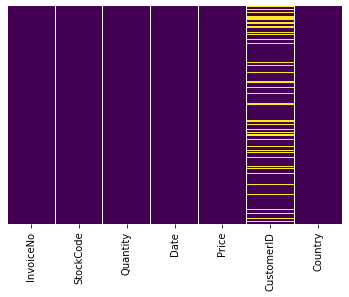

In [17]:
#See where we are missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [18]:
#Decide to remove or replace null values (replace through imputation for each column)
#We decide to remove all rows with null values. 
#Remove nulls then check the result.
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo     0
StockCode     0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [19]:
#See the number of rows and columns we have now.
df.shape

(82259, 7)

### f. Reformat column data types as needed

In [20]:
#Check the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82259 entries, 9 to 541880
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   InvoiceNo   82259 non-null  object 
 1   StockCode   82259 non-null  object 
 2   Quantity    82259 non-null  int64  
 3   Date        82259 non-null  object 
 4   Price       82259 non-null  float64
 5   CustomerID  82259 non-null  float64
 6   Country     82259 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.0+ MB


In [21]:
#Change a column's data type and check to see that it changed.
df = df.astype({"CustomerID": 'str', "Date": 'datetime64[ns]'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82259 entries, 9 to 541880
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   InvoiceNo   82259 non-null  object        
 1   StockCode   82259 non-null  object        
 2   Quantity    82259 non-null  int64         
 3   Date        82259 non-null  datetime64[ns]
 4   Price       82259 non-null  float64       
 5   CustomerID  82259 non-null  object        
 6   Country     82259 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 5.0+ MB


# 3. Clean Rows

### a. Remove unnecessary rows for categorical variables

In [22]:
#See the unique values in a column
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Germany', 'EIRE',
       'Portugal', 'Japan', 'Poland', 'Channel Islands', 'Netherlands',
       'Spain', 'Cyprus', 'Belgium', 'Greece', 'Norway', 'Austria',
       'Denmark', 'United Arab Emirates', 'Italy', 'Switzerland',
       'Sweden', 'USA', 'Finland', 'Unspecified', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Israel', 'Thailand', 'Lithuania',
       'Nigeria', 'West Indies', 'Brazil', 'Korea', 'Canada', 'Iceland',
       'Lebanon', 'Czechia', 'European Community'], dtype=object)

In [23]:
#Remove rows for the value of a category that we do not need. 
#Keep only the rows in the data that do not include a certain categorical value in a column.
#Check the result
df=df[~df['Country'].isin(['Unspecified'])]
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Germany', 'EIRE',
       'Portugal', 'Japan', 'Poland', 'Channel Islands', 'Netherlands',
       'Spain', 'Cyprus', 'Belgium', 'Greece', 'Norway', 'Austria',
       'Denmark', 'United Arab Emirates', 'Italy', 'Switzerland',
       'Sweden', 'USA', 'Finland', 'Malta', 'RSA', 'Singapore', 'Bahrain',
       'Israel', 'Thailand', 'Lithuania', 'Nigeria', 'West Indies',
       'Brazil', 'Korea', 'Canada', 'Iceland', 'Lebanon', 'Czechia',
       'European Community'], dtype=object)

### b. Remove unnecessary rows of numerical data

In [24]:
#Remove rows of items that were returned that have a 'C' in the stockcode.
#See how many rows are left.
df = df[~df['InvoiceNo'].str.contains('C', na=False)]
df.shape

(80339, 7)

In [25]:
#Remove negative prices and negative quantities. We'll keep their initial orders.
#Keep only the rows that are greater than zero. 
#Check the resulting min and max.
df = df[df['Price'] > 0]
df = df[df['Quantity'] > 0]
df.describe()

,Quantity,Price
count,80330.000000,80330.000000
mean,13.834346,3.406488
std,267.243861,53.198531
min,1.000000,0.001000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,74215.000000,10953.500000


### c. Remove rows outside of target timeframe

In [26]:
#Get the range of dates in the date column.
date_range = str(df['Date'].min()) + ' to ' + str(df['Date'].max())
date_range

'2009-12-01 00:00:00 to 2011-12-09 00:00:00'

In [27]:
#Remove rows with dates that are before or after the dates we want to include by only specifying the dates we want to include.
df=df.loc[(df['Date'] >= '2009-12-01 00:00:00') & (df['Date'] <= '2011-11-30 23:59:59')]
df.shape

(78588, 7)

### d. Remove duplicate rows

In [28]:
#See how many rows are duplicates of another row
df.duplicated(subset=None, keep='first').sum()

288

In [29]:
#See a list of all duplicate rows (including the ones you want to keep) and sort them ascending using the CustomerID column and then the date column
df[df.duplicated(subset=None, keep=False)].sort_values(['CustomerID', 'Date'])

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
520011,537676,22555,12,2010-12-08,1.65,12386.0,Australia
17072,537676,22555,12,2010-12-08,1.65,12386.0,Australia
522960,538003,22670,36,2010-12-09,1.25,12429.0,Denmark
522971,538003,22914,6,2010-12-09,4.95,12429.0,Denmark
20033,538003,22914,6,2010-12-09,4.95,12429.0,Denmark
...,...,...,...,...,...,...,...
511049,537126,84596G,1,2010-12-05,1.25,18118.0,United Kingdom
511241,537133,22274,1,2010-12-05,2.95,18156.0,United Kingdom
8297,537133,22274,1,2010-12-05,2.95,18156.0,United Kingdom
200749,554157,23208,1,2011-05-23,1.65,18283.0,United Kingdom


In [30]:
#Remove duplicate rows and see how many rows you now have.
df.drop_duplicates(inplace=True)
df.shape

(78300, 7)

### e. Remove rows with outliers as appropriate

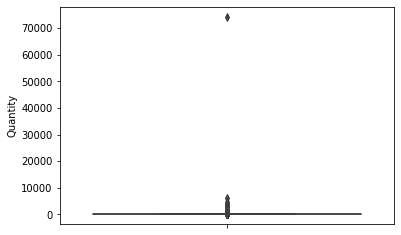

In [31]:
#Look at a boxplot of numerical columns to identify possible outliers
sns.boxplot(y='Quantity', data=df)

In [32]:
#Sort the values of the column descending to identify possible outliers
df.sort_values('Quantity', ascending=False).head(10)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
61619,541431,23166,74215,2011-01-18,1.04,12346.0,United Kingdom
432177,530715,17003,6336,2010-11-04,0.19,15838.0,United Kingdom
358738,524174,85110,4752,2010-09-27,0.07,13687.0,United Kingdom
97432,544612,22053,3906,2011-02-22,0.82,18087.0,United Kingdom
298935,518505,21392,3648,2010-08-09,0.13,14277.0,France
228042,511465,15044A,3500,2010-06-08,2.55,18008.0,United Kingdom
358736,524174,85160B,2976,2010-09-27,0.13,13687.0,United Kingdom
507883,536830,84077,2880,2010-12-02,0.18,16754.0,United Kingdom
432171,530714,21704,1944,2010-11-04,0.72,16754.0,United Kingdom
298918,518505,85006,1440,2010-08-09,0.31,14277.0,France


In [33]:
#Remove an outlier row that may be a mistake and then recheck the data
df.drop(labels=61619, axis=0, inplace=True)
df.sort_values('Quantity', ascending=False).head(5)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
432177,530715,17003,6336,2010-11-04,0.19,15838.0,United Kingdom
358738,524174,85110,4752,2010-09-27,0.07,13687.0,United Kingdom
97432,544612,22053,3906,2011-02-22,0.82,18087.0,United Kingdom
298935,518505,21392,3648,2010-08-09,0.13,14277.0,France
228042,511465,15044A,3500,2010-06-08,2.55,18008.0,United Kingdom


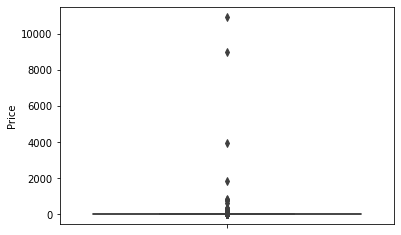

In [34]:
#Look at a boxplot of another numerical column to identify possible outliers
sns.boxplot(y='Price', data=df)

In [35]:
#Sort the values of the column descending to identify possible outliers
df.sort_values('Price', ascending=False).head(10)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
135013,502263,M,1,2010-03-23,10953.50,12918.0,United Kingdom
74356,496115,M,1,2010-01-29,8985.60,17949.0,United Kingdom
406406,571751,M,1,2011-10-19,3949.32,12744.0,Singapore
322140,520750,M,1,2010-08-31,1868.56,15480.0,Malta
228919,511520,M,1,2010-06-08,849.45,14308.0,United Kingdom
292749,517934,M,1,2010-08-03,800.00,12748.0,United Kingdom
48348,493900,M,1,2010-01-08,780.52,14911.0,EIRE
407877,528420,M,1,2010-10-22,780.25,14911.0,EIRE
416464,572552,DOT,1,2011-10-24,638.30,14096.0,United Kingdom
106398,545332,M,1,2011-03-01,376.50,12352.0,Norway


In [36]:
#Remove outlier rows that may be mistakes and recheck the data
df.drop(df[df['Price'] > 1000].index, axis=0, inplace = True)
df.sort_values('Price', ascending=False).head(5)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
228919,511520,M,1,2010-06-08,849.45,14308.0,United Kingdom
292749,517934,M,1,2010-08-03,800.00,12748.0,United Kingdom
48348,493900,M,1,2010-01-08,780.52,14911.0,EIRE
407877,528420,M,1,2010-10-22,780.25,14911.0,EIRE
416464,572552,DOT,1,2011-10-24,638.30,14096.0,United Kingdom


In [37]:
#Check how many rows you have now
df.shape

(78295, 7)

In [38]:
#Reset the index
df=df.reset_index()
df.head()

,index,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
0,9,489435,22349,12,2009-12-01,3.75,13085.0,United Kingdom
1,15,489436,84879,16,2009-12-01,1.69,13078.0,United Kingdom
2,13,489436,21755,18,2009-12-01,5.45,13078.0,United Kingdom
3,53,489437,22112,3,2009-12-01,4.95,15362.0,United Kingdom
4,73,489439,22139,9,2009-12-01,4.95,12682.0,France


### f. Remove extra spaces in a column with text

In [39]:
#Remove leading and trailing white spaces from a column with strings
df['Country'] = df['Country'].str.strip()
df

,index,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
0,9,489435,22349,12,2009-12-01,3.75,13085.0,United Kingdom
1,15,489436,84879,16,2009-12-01,1.69,13078.0,United Kingdom
2,13,489436,21755,18,2009-12-01,5.45,13078.0,United Kingdom
3,53,489437,22112,3,2009-12-01,4.95,15362.0,United Kingdom
4,73,489439,22139,9,2009-12-01,4.95,12682.0,France
...,...,...,...,...,...,...,...,...
78290,516227,579885,22156,10,2011-11-30,0.85,15444.0,United Kingdom
78291,516286,579885,22988,12,2011-11-30,1.25,15444.0,United Kingdom
78292,516226,579885,21446,6,2011-11-30,1.25,15444.0,United Kingdom
78293,516319,579885,23027,6,2011-11-30,2.08,15444.0,United Kingdom


# 4. Feature Engineering 

### a. Combine categories within a categorical variable

In [40]:
#List columns that are categorical (not numerical)
df.select_dtypes(['object']).columns

Index(['InvoiceNo', 'StockCode', 'CustomerID', 'Country'], dtype='object')

In [41]:
#For each relevant categorical variable column, look at the counts for each value to see if an infrequent category needs to be dropped or combined with another category.
#See what values are in the column and count how many are in each category.
df['Country'].value_counts()

United Kingdom          70463
Germany                  1646
EIRE                     1513
France                   1321
Netherlands               524
Spain                     366
Belgium                   308
Switzerland               307
Portugal                  236
Australia                 189
Channel Islands           156
Norway                    136
Italy                     135
Sweden                    129
Cyprus                    124
Finland                   111
Austria                    79
Denmark                    72
Greece                     66
Japan                      54
Poland                     51
United Arab Emirates       43
USA                        42
Singapore                  37
Israel                     35
Malta                      28
Lithuania                  23
Iceland                    21
Canada                     17
RSA                        13
Korea                       9
Bahrain                     8
West Indies                 6
Lebanon   

In [42]:
#Get a list of the categories in the categorical variable to get ready to copy and paste what you want to combine.
df['Country'].unique()

array(['United Kingdom', 'France', 'Germany', 'EIRE', 'Portugal',
       'Poland', 'Channel Islands', 'Netherlands', 'Spain', 'Cyprus',
       'Belgium', 'Greece', 'Norway', 'Austria', 'United Arab Emirates',
       'Italy', 'Switzerland', 'Australia', 'Sweden', 'USA', 'Denmark',
       'Finland', 'Malta', 'RSA', 'Japan', 'Singapore', 'Bahrain',
       'Israel', 'Thailand', 'Lithuania', 'Nigeria', 'West Indies',
       'Brazil', 'Canada', 'Iceland', 'Korea', 'Lebanon', 'Czechia',
       'European Community'], dtype=object)

In [43]:
#Combine a few of the smaller categories into an 'Other' category and make the change permenant.
#Then look at the new value counts.
df['Country']=df['Country'].replace(['Lebanon', 'Czechia', 'Saudi Arabia','United Arab Emirates', 'Bahrain', 'RSA', 'European Community', 'Lithuania'], 'Other')
df['Country'].value_counts()

United Kingdom     70463
Germany             1646
EIRE                1513
France              1321
Netherlands          524
Spain                366
Belgium              308
Switzerland          307
Portugal             236
Australia            189
Channel Islands      156
Norway               136
Italy                135
Sweden               129
Cyprus               124
Finland              111
Other                102
Austria               79
Denmark               72
Greece                66
Japan                 54
Poland                51
USA                   42
Singapore             37
Israel                35
Malta                 28
Iceland               21
Canada                17
Korea                  9
West Indies            6
Thailand               5
Brazil                 4
Nigeria                3
Name: Country, dtype: int64

### b. Create a new date column using datetime data

In [44]:
#Make new columns for Year and Month using a date-time column
df['Year']=df['Date'].apply(lambda date : date.year)
df['Month']=df['Date'].apply(lambda date : date.month)
df.head(2)

,index,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country,Year,Month
0,9,489435,22349,12,2009-12-01,3.75,13085.0,United Kingdom,2009,12
1,15,489436,84879,16,2009-12-01,1.69,13078.0,United Kingdom,2009,12


In [45]:
#Look at the value counts for the new 'Year' column
df['Year'].value_counts()

2010    40063
2011    35165
2009     3067
Name: Year, dtype: int64

In [46]:
#Look at the range of dates included in the data
df['Date']

0       2009-12-01
1       2009-12-01
2       2009-12-01
3       2009-12-01
4       2009-12-01
           ...    
78290   2011-11-30
78291   2011-11-30
78292   2011-11-30
78293   2011-11-30
78294   2011-11-30
Name: Date, Length: 78295, dtype: datetime64[ns]

In [47]:
#Create a column for the order month and order quarter
#Create a column for the cohort month and cohort quarter based on the earliest purchase date
#Sort by customerID and date
df['Order Month']=df['Date'].dt.to_period('M')
df['Cohort Month']=df.groupby('CustomerID')['Date'].transform('min').dt.to_period('M')
df['Order Quarter']=df['Date'].dt.to_period('Q')
df['Cohort Quarter']=df.groupby('CustomerID')['Date'].transform('min').dt.to_period('Q')
df.head(5).sort_values(['Date', 'CustomerID'])

,index,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country,Year,Month,Order Month,Cohort Month,Order Quarter,Cohort Quarter
4,73,489439,22139,9,2009-12-01,4.95,12682.0,France,2009,12,2009-12,2009-12,2009Q4,2009Q4
1,15,489436,84879,16,2009-12-01,1.69,13078.0,United Kingdom,2009,12,2009-12,2009-12,2009Q4,2009Q4
2,13,489436,21755,18,2009-12-01,5.45,13078.0,United Kingdom,2009,12,2009-12,2009-12,2009Q4,2009Q4
0,9,489435,22349,12,2009-12-01,3.75,13085.0,United Kingdom,2009,12,2009-12,2009-12,2009Q4,2009Q4
3,53,489437,22112,3,2009-12-01,4.95,15362.0,United Kingdom,2009,12,2009-12,2009-12,2009Q4,2009Q4


### c. Create a new column of data using numerical data

In [48]:
# Create a revenue colummn by multiplying two columns to see total spent for that person for that transaction
df["Revenue"] = df["Quantity"] * df["Price"]
df.head(2)

,index,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country,Year,Month,Order Month,Cohort Month,Order Quarter,Cohort Quarter,Revenue
0,9,489435,22349,12,2009-12-01,3.75,13085.0,United Kingdom,2009,12,2009-12,2009-12,2009Q4,2009Q4,45.00
1,15,489436,84879,16,2009-12-01,1.69,13078.0,United Kingdom,2009,12,2009-12,2009-12,2009Q4,2009Q4,27.04


In [49]:
#Get the total number of unique products, transactions, and customers
countries=df['Country'].nunique()
customers=df['CustomerID'].nunique()
products=df['StockCode'].nunique()
transactions=df['InvoiceNo'].nunique()

summary1 = [countries, customers, products, transactions]
labels1 = ['Countries','Customers', 'Products', 'Transactions']
uniques1 = pd.DataFrame(summary1,labels1, ['Totals']).applymap('{:,.0f}'.format)
uniques1

,Totals
Countries,33
Customers,"5,206"
Products,"4,007"
Transactions,"25,196"


In [50]:
#Calculate quantity of orders made by each customer
#Sort descending
n_orders = df.groupby(['CustomerID'])['InvoiceNo'].nunique()
n_orders.sort_values(ascending=False)

CustomerID
14911.0    302
12748.0    197
17841.0    192
14606.0    170
15311.0    160
          ... 
15097.0      1
15100.0      1
12798.0      1
12799.0      1
12346.0      1
Name: InvoiceNo, Length: 5206, dtype: int64

In [51]:
#Calculate the percent of customers who ordered more than once.
multi_orders_percent = (np.sum(n_orders > 1) / df['CustomerID'].nunique())
print(f'{100 * multi_orders_percent:.1f}% of customers ordered more than once.')

67.1% of customers ordered more than once.


### d. Reorder columns

In [52]:
#Get the column names before you reorder them
df.columns

Index(['index', 'InvoiceNo', 'StockCode', 'Quantity', 'Date', 'Price',
       'CustomerID', 'Country', 'Year', 'Month', 'Order Month', 'Cohort Month',
       'Order Quarter', 'Cohort Quarter', 'Revenue'],
      dtype='object')

In [53]:
#Reorder columns so that they look the way we like.
df=df[['index', 'InvoiceNo', 'StockCode', 'Quantity', 'Date', 'Price', 'Revenue','CustomerID', 'Country', 'Year', 'Month', 'Order Month', 'Cohort Month','Order Quarter', 'Cohort Quarter']]
df.head(2)

,index,InvoiceNo,StockCode,Quantity,Date,Price,Revenue,CustomerID,Country,Year,Month,Order Month,Cohort Month,Order Quarter,Cohort Quarter
0,9,489435,22349,12,2009-12-01,3.75,45.00,13085.0,United Kingdom,2009,12,2009-12,2009-12,2009Q4,2009Q4
1,15,489436,84879,16,2009-12-01,1.69,27.04,13078.0,United Kingdom,2009,12,2009-12,2009-12,2009Q4,2009Q4


# 5. Analysis of Monthly Cohorts

### a. Create Monthly Cohorts

In [54]:
#Aggregate the data by cohort and order month and count the number of unique customers in each group.
#Calculate the number of periods between the cohort month and the month of purchase
#Rename columns as we like.
from operator import attrgetter
df_cohort_m = df.groupby(['Cohort Month', 'Order Month']).agg({'CustomerID':'nunique','InvoiceNo': 'count', 'Price':'mean', 'Revenue': 'sum'}).reset_index(drop=False)
df_cohort_m['Month Period Number'] = (df_cohort_m['Order Month'] - df_cohort_m['Cohort Month']).apply(attrgetter('n'))
df_cohort_m.rename(columns = {'InvoiceNo': 'Orders', 'CustomerID': 'Total Customers', 'Price': 'Average Price'}, inplace=True)
df_cohort_m

,Cohort Month,Order Month,Total Customers,Orders,Average Price,Revenue,Month Period Number
0,2009-12,2009-12,744,3067,3.153857,62733.68,0
1,2009-12,2010-01,230,1112,4.011340,38287.58,1
2,2009-12,2010-02,213,1080,3.035537,22007.46,2
3,2009-12,2010-03,281,1315,2.937247,32566.95,3
4,2009-12,2010-04,244,1127,3.587853,25134.33,4
...,...,...,...,...,...,...,...
295,2011-09,2011-10,42,365,5.250110,4711.39,1
296,2011-09,2011-11,59,401,3.168653,4814.81,2
297,2011-10,2011-10,207,840,2.727131,10760.26,0
298,2011-10,2011-11,65,313,2.638179,3916.70,1


In [55]:
#Pivot the table so each row describes a cohort and each column is a period.
#Remove the decimal for these whole numbers.
cohort_pivot_m = df_cohort_m.pivot_table(index='Cohort Month', columns = 'Month Period Number', values='Total Customers')
cohort_pivot_m.applymap('{:.0f}'.format)

Month Period Number,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Cohort Month,,,,,,,,,,,,,,,,,,,,,
2009-12,744,230,213,281,244,233,243,221,225,237,...,144,186,160,190,185,164,162,198,192,264
2010-01,323,66,100,84,89,86,80,67,85,98,...,59,45,68,54,61,62,66,63,80,nan
2010-02,330,71,74,87,82,65,70,91,80,77,...,36,66,49,55,47,76,78,58,nan,nan
2010-03,387,70,77,87,69,71,90,108,99,46,...,60,58,56,59,63,74,80,nan,nan,nan
2010-04,264,36,42,47,42,48,68,68,31,31,...,33,40,32,33,47,55,nan,nan,nan,nan
2010-05,227,30,29,35,28,54,39,32,13,18,...,19,23,32,35,33,nan,nan,nan,nan,nan
2010-06,230,31,28,37,49,61,26,14,17,24,...,21,26,30,40,nan,nan,nan,nan,nan,nan
2010-07,173,24,28,47,38,18,18,19,18,16,...,30,24,34,nan,nan,nan,nan,nan,nan,nan
2010-08,167,29,42,44,26,13,14,14,25,18,...,27,30,nan,nan,nan,nan,nan,nan,nan,nan


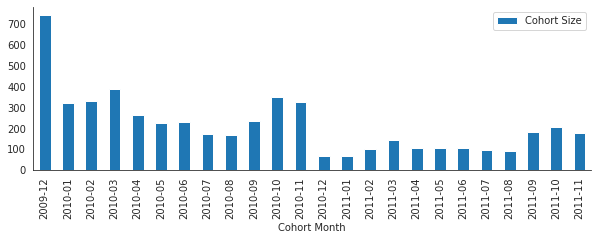

In [56]:
#Look at cohort starting size over time
cohort_size_m = cohort_pivot_m.iloc[:,0]
cohort_size_df_m = pd.DataFrame(cohort_size_m).rename(columns={0: 'Cohort Size'})
sns.set_style('white')
cohort_size_df_m.plot.bar(figsize=(10, 3))
sns.despine()

### b. Monthly Initial Drop-off Rates

In [57]:
#Get the Initial Drop-off Rate for each cohort
cohort_size_m = cohort_pivot_m.iloc[:,0]
retention_matrix_m = cohort_pivot_m.divide(cohort_size_m, axis=0)
dropoff_m = retention_matrix_m 
dropoff_m['Dropoff Rate'] = dropoff_m[0]-dropoff_m[1]
dropoff_m['Dropoff Rate']

Cohort Month
2009-12    0.690860
2010-01    0.795666
2010-02    0.784848
2010-03    0.819121
2010-04    0.863636
2010-05    0.867841
2010-06    0.865217
2010-07    0.861272
2010-08    0.826347
2010-09    0.793991
2010-10    0.796562
2010-11    0.834356
2010-12    0.956522
2011-01    0.880597
2011-02    0.862745
2011-03    0.839161
2011-04    0.780952
2011-05    0.820755
2011-06    0.813084
2011-07    0.851064
2011-08    0.791209
2011-09    0.771739
2011-10    0.685990
2011-11         NaN
Freq: M, Name: Dropoff Rate, dtype: float64

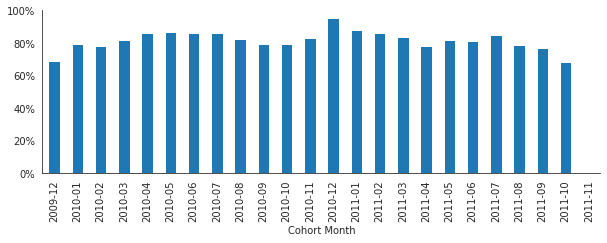

In [58]:
#Plot Initial Dropoff Rate for each cohort
#This is the percent of people who make at least one purchase one month and then do not purchase again the next month.
import matplotlib.ticker as mtick
sns.set_style('white')
dropoff_m['Dropoff Rate'].plot.bar(figsize=(10, 3))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
sns.despine()

In [59]:
#Get the average initial drop off rate of all cohorts
'{:.2%}'.format(dropoff_m['Dropoff Rate'].mean())

'81.97%'

### c. Monthly Retention Rates

In [60]:
#Divide the number of customers in each row by the first value of the row which is the cohort size when it started.
#Get the first column then divide each item in the row by that first number.
cohort_size_m = cohort_pivot_m.iloc[:,0]
retention_matrix_m = cohort_pivot_m.divide(cohort_size_m, axis=0)
retention_matrix_m.applymap('{:,.1%}'.format)

Month Period Number,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Cohort Month,,,,,,,,,,,,,,,,,,,,,
2009-12,100.0%,30.9%,28.6%,37.8%,32.8%,31.3%,32.7%,29.7%,30.2%,31.9%,...,19.4%,25.0%,21.5%,25.5%,24.9%,22.0%,21.8%,26.6%,25.8%,35.5%
2010-01,100.0%,20.4%,31.0%,26.0%,27.6%,26.6%,24.8%,20.7%,26.3%,30.3%,...,18.3%,13.9%,21.1%,16.7%,18.9%,19.2%,20.4%,19.5%,24.8%,nan%
2010-02,100.0%,21.5%,22.4%,26.4%,24.8%,19.7%,21.2%,27.6%,24.2%,23.3%,...,10.9%,20.0%,14.8%,16.7%,14.2%,23.0%,23.6%,17.6%,nan%,nan%
2010-03,100.0%,18.1%,19.9%,22.5%,17.8%,18.3%,23.3%,27.9%,25.6%,11.9%,...,15.5%,15.0%,14.5%,15.2%,16.3%,19.1%,20.7%,nan%,nan%,nan%
2010-04,100.0%,13.6%,15.9%,17.8%,15.9%,18.2%,25.8%,25.8%,11.7%,11.7%,...,12.5%,15.2%,12.1%,12.5%,17.8%,20.8%,nan%,nan%,nan%,nan%
2010-05,100.0%,13.2%,12.8%,15.4%,12.3%,23.8%,17.2%,14.1%,5.7%,7.9%,...,8.4%,10.1%,14.1%,15.4%,14.5%,nan%,nan%,nan%,nan%,nan%
2010-06,100.0%,13.5%,12.2%,16.1%,21.3%,26.5%,11.3%,6.1%,7.4%,10.4%,...,9.1%,11.3%,13.0%,17.4%,nan%,nan%,nan%,nan%,nan%,nan%
2010-07,100.0%,13.9%,16.2%,27.2%,22.0%,10.4%,10.4%,11.0%,10.4%,9.2%,...,17.3%,13.9%,19.7%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2010-08,100.0%,17.4%,25.1%,26.3%,15.6%,7.8%,8.4%,8.4%,15.0%,10.8%,...,16.2%,18.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%


In [157]:
retention_matrix_m.rename(columns={'mean': 'Mean'}, inplace=True)
retention_matrix_m

Month Period Number,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Mean
Cohort Month,,,,,,,,,,,,,,,,,,,,,
2009-12,1.0,0.309140,0.286290,0.377688,0.327957,0.313172,0.326613,0.297043,0.302419,0.318548,...,0.250000,0.215054,0.255376,0.248656,0.220430,0.217742,0.266129,0.258065,0.354839,0.289651
2010-01,1.0,0.204334,0.309598,0.260062,0.275542,0.266254,0.247678,0.207430,0.263158,0.303406,...,0.139319,0.210526,0.167183,0.188854,0.191950,0.204334,0.195046,0.247678,NaN,0.224740
2010-02,1.0,0.215152,0.224242,0.263636,0.248485,0.196970,0.212121,0.275758,0.242424,0.233333,...,0.200000,0.148485,0.166667,0.142424,0.230303,0.236364,0.175758,NaN,NaN,0.193651
2010-03,1.0,0.180879,0.198966,0.224806,0.178295,0.183463,0.232558,0.279070,0.255814,0.118863,...,0.149871,0.144703,0.152455,0.162791,0.191214,0.206718,NaN,NaN,NaN,0.176486
2010-04,1.0,0.136364,0.159091,0.178030,0.159091,0.181818,0.257576,0.257576,0.117424,0.117424,...,0.151515,0.121212,0.125000,0.178030,0.208333,NaN,NaN,NaN,NaN,0.157695
2010-05,1.0,0.132159,0.127753,0.154185,0.123348,0.237885,0.171806,0.140969,0.057269,0.079295,...,0.101322,0.140969,0.154185,0.145374,NaN,NaN,NaN,NaN,NaN,0.131914
2010-06,1.0,0.134783,0.121739,0.160870,0.213043,0.265217,0.113043,0.060870,0.073913,0.104348,...,0.113043,0.130435,0.173913,NaN,NaN,NaN,NaN,NaN,NaN,0.133504
2010-07,1.0,0.138728,0.161850,0.271676,0.219653,0.104046,0.104046,0.109827,0.104046,0.092486,...,0.138728,0.196532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141980
2010-08,1.0,0.173653,0.251497,0.263473,0.155689,0.077844,0.083832,0.083832,0.149701,0.107784,...,0.179641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.146906


<Figure size 432x288 with 0 Axes>

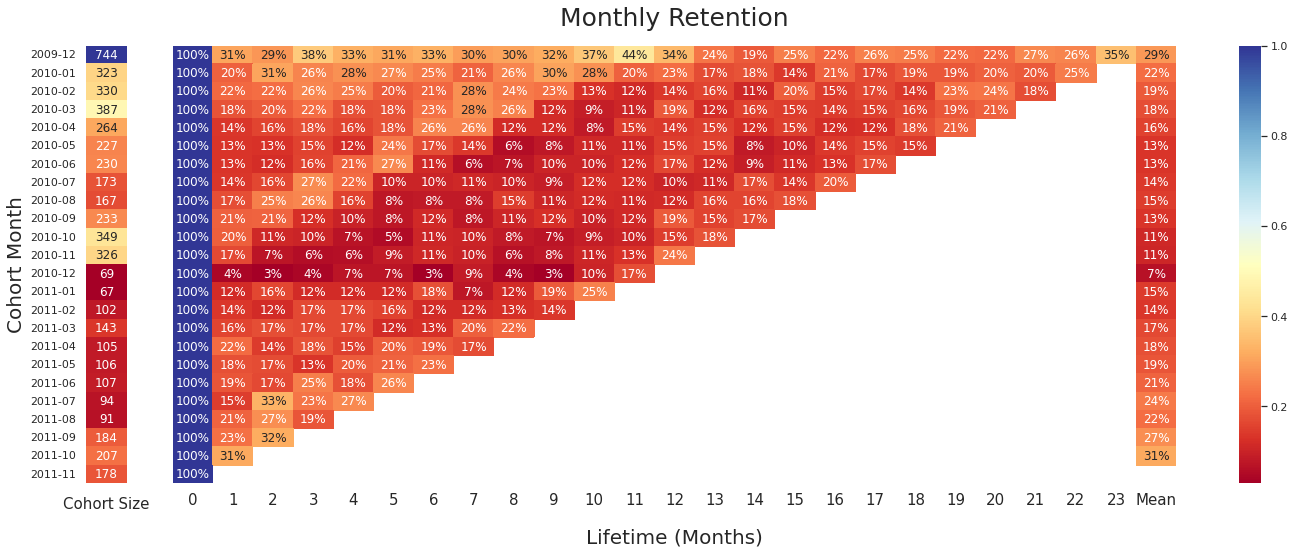

In [161]:
#Create a heatmap of retention rates

#Set the style
sns.set_style('white')
sns.despine()

fig, ax = plt.subplots(1, 2, figsize=(20, 7), sharey=True, gridspec_kw={'width_ratios': [.5, 15]})
sns.heatmap(retention_matrix_m, mask=retention_matrix_m.isnull(), annot=True, fmt='.0%', cmap='RdYlBu', ax=ax[1])

#Add a column with cohort size
cohort_size_df_m = pd.DataFrame(cohort_size_m).rename(columns={0: 'Cohort Size'})
sns.heatmap(cohort_size_df_m, annot=True, cbar=False, fmt='g', ax=ax[0], cmap='RdYlBu')
fig.tight_layout()

#Set labels
plt.xlabel("Lifetime (Months)", size=20, labelpad=20)
plt.ylabel("", size=0, labelpad=0)
ax[0].set_ylabel('Cohort Month', fontsize=20)
ax[0].set_xlabel('Cohort Size', fontsize=15)
ax[0].set_xticklabels('', fontsize=0)
plt.title("Monthly Retention", size=25, pad=20)
plt.tick_params(axis='both', which='major', labelsize=15)

In [62]:
#Get the Average retention rate for each cohort, excluding the first month when customers are new.
retention_ave_m = retention_matrix_m 
retention_ave_m['mean'] = retention_matrix_m.iloc[:, 1:24].mean(axis=1)
retention_ave_m['mean']

Cohort Month
2009-12    0.292485
2010-01    0.224740
2010-02    0.193651
2010-03    0.176486
2010-04    0.157695
2010-05    0.131914
2010-06    0.133504
2010-07    0.141980
2010-08    0.146906
2010-09    0.133967
2010-10    0.110205
2010-11    0.106084
2010-12    0.065876
2011-01    0.146269
2011-02    0.138344
2011-03    0.167832
2011-04    0.179592
2011-05    0.185535
2011-06    0.209346
2011-07    0.244681
2011-08    0.223443
2011-09    0.274457
2011-10    0.314010
2011-11         NaN
Freq: M, Name: mean, dtype: float64

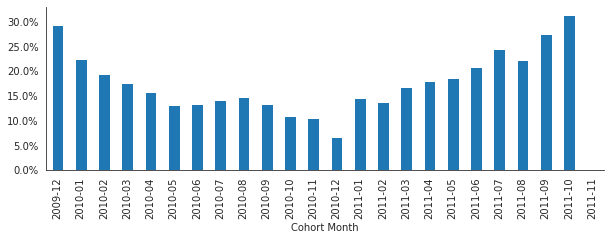

In [63]:
#Plot average monthly retention rate for each cohort
sns.set_style('white')
retention_ave_m['mean'].plot.bar(figsize=(10, 3))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
sns.despine()

In [64]:
#Get the average retention rate of all cohorts
'{:.2%}'.format(retention_ave_m['mean'].mean())

'17.82%'

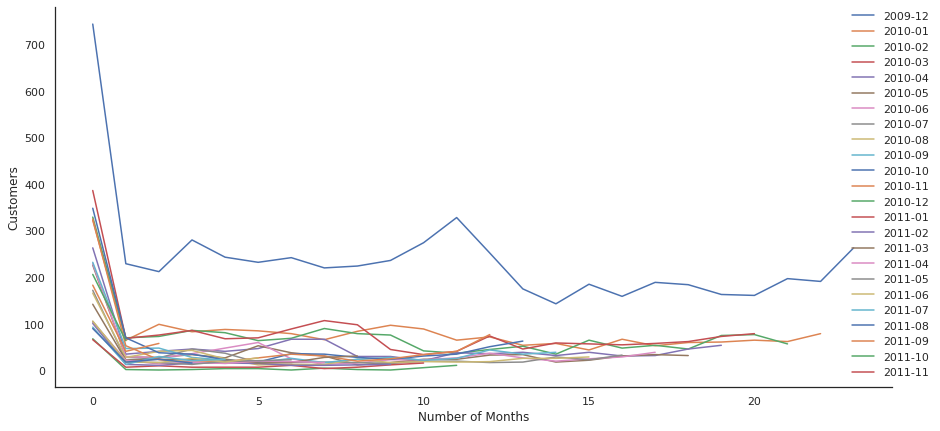

In [65]:
#Plot the number of customers for each cohort for duration in months
sns.set(style='white')
cohorts_line_m = cohort_pivot_m.transpose()
cohorts_line_m[cohorts_line_m.columns].plot(figsize=(15,7), xlabel='Number of Months', ylabel='Customers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0, frameon=False)
sns.despine()

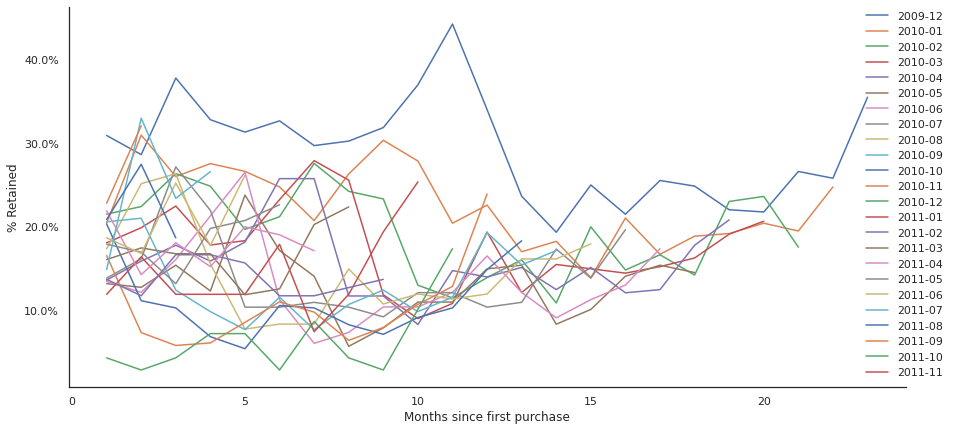

In [66]:
#Plot the percent retained for each cohort for each month. 
#Drop the starting month which is 100% for everyone
#Format the y axis to show percentages
import matplotlib.ticker as mtick
sns.set(style='white')
ret_ex_start_m=retention_matrix_m.drop([0,'mean'], axis=1)
ret_ex_start_m
retention_lines_m = ret_ex_start_m.transpose()
retention_lines_m[retention_lines_m.columns].plot(figsize=(15,7), xlabel='Months since first purchase', ylabel='% Retained')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0, frameon=False)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
sns.despine()

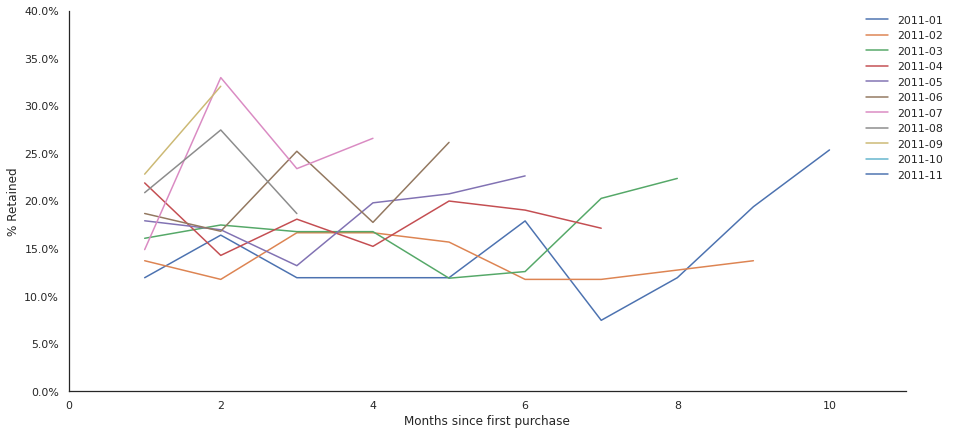

In [67]:
#Plot the Percent retained for each cohort for each month for just 2011
#Format the y axis to show percentages
import matplotlib.ticker as mtick
sns.set(style='white')
retention_lines_2011_m = ret_ex_start_m.transpose()
retlines_2011_m = retention_lines_2011_m.iloc[:,-11:]
retlines_2011_m[retlines_2011_m.columns].plot(figsize=(15,7), xlabel='Months since first purchase', ylabel='% Retained')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0, frameon=False)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.ylim(0, .4)
plt.xlim(0, 11)
sns.despine()

### d. Slope of Monthly Retention

In [68]:
#Prepare to calculate slope for each cohort
#Remove the first column because of the high drop off rates
#Remove last two columns because they only have NaN or one number and can't be used for linear regression.
slope_m=cohort_pivot_m.T
slope_m=slope_m.reset_index(inplace=False)
slope_m.drop([0], axis=0, inplace=True)
slope_m=slope_m.iloc[: , :-2]
slope_m

Cohort Month,Month Period Number,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09
1,1,230.0,66.0,71.0,70.0,36.0,30.0,31.0,24.0,29.0,...,3.0,8.0,14.0,23.0,23.0,19.0,20.0,14.0,19.0,42.0
2,2,213.0,100.0,74.0,77.0,42.0,29.0,28.0,28.0,42.0,...,2.0,11.0,12.0,25.0,15.0,18.0,18.0,31.0,25.0,59.0
3,3,281.0,84.0,87.0,87.0,47.0,35.0,37.0,47.0,44.0,...,3.0,8.0,17.0,24.0,19.0,14.0,27.0,22.0,17.0,NaN
4,4,244.0,89.0,82.0,69.0,42.0,28.0,49.0,38.0,26.0,...,5.0,8.0,17.0,24.0,16.0,21.0,19.0,25.0,NaN,NaN
5,5,233.0,86.0,65.0,71.0,48.0,54.0,61.0,18.0,13.0,...,5.0,8.0,16.0,17.0,21.0,22.0,28.0,NaN,NaN,NaN
6,6,243.0,80.0,70.0,90.0,68.0,39.0,26.0,18.0,14.0,...,2.0,12.0,12.0,18.0,20.0,24.0,NaN,NaN,NaN,NaN
7,7,221.0,67.0,91.0,108.0,68.0,32.0,14.0,19.0,14.0,...,6.0,5.0,12.0,29.0,18.0,NaN,NaN,NaN,NaN,NaN
8,8,225.0,85.0,80.0,99.0,31.0,13.0,17.0,18.0,25.0,...,3.0,8.0,13.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN
9,9,237.0,98.0,77.0,46.0,31.0,18.0,24.0,16.0,18.0,...,2.0,13.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,275.0,90.0,43.0,35.0,22.0,25.0,24.0,21.0,20.0,...,7.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#Get the slope for each cohort
#Drop the first column because it has the month period numbers
from scipy.stats import linregress
cohort_slope_m = pd.DataFrame()
for column in slope_m.columns:
  clean_slope_m = slope_m[column].dropna()
  slope, intercept, r, p, stderr = linregress(clean_slope_m.index, clean_slope_m)
  cohort_slope_m = pd.concat([cohort_slope_m,(pd.DataFrame({'Slope':slope,'Intercept':intercept}, index=[column]))])
cohort_slope_m.drop(['Month Period Number'], axis=0, inplace=True)
cohort_slope_m

,Slope,Intercept
2009-12,-3.016798,253.810277
2010-01,-1.295878,87.493506
2010-02,-1.128571,76.319048
2010-03,-0.981955,78.610526
2010-04,-0.335088,44.982456
2010-05,-0.250774,32.326797
2010-06,-0.443627,34.698529
2010-07,-0.354412,27.575000
2010-08,-0.564286,29.047619
2010-09,-0.081319,31.824176


(0.0, 25.0)

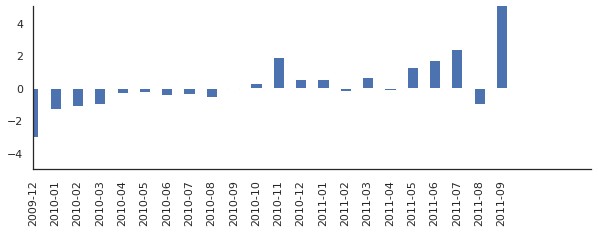

In [70]:
#Look at the slopes for the linear regression lines for each cohort's monthly retention.
#The graph below shows that retention tends to be negative for older cohorts but tends to be positive for newer cohorts.
sns.set_style('white')
cohort_slope_m['Slope'].plot.bar(figsize=(10, 3))
sns.despine()
plt.ylim(-5, 5)
plt.xlim(0, 25)

### e. Terminal Retention Rates

In [71]:
#Get the average retention rate for each monthly cohort
retention_ave_m = retention_matrix_m 
retention_ave_m['mean'] = retention_matrix_m.iloc[:, 1:23].mean(axis=1)
retention_ave_m['mean'].apply('{:,.2%}'.format)

Cohort Month
2009-12    28.97%
2010-01    22.47%
2010-02    19.37%
2010-03    17.65%
2010-04    15.77%
2010-05    13.19%
2010-06    13.35%
2010-07    14.20%
2010-08    14.69%
2010-09    13.40%
2010-10    11.02%
2010-11    10.61%
2010-12     6.59%
2011-01    14.63%
2011-02    13.83%
2011-03    16.78%
2011-04    17.96%
2011-05    18.55%
2011-06    20.93%
2011-07    24.47%
2011-08    22.34%
2011-09    27.45%
2011-10    31.40%
2011-11      nan%
Freq: M, Name: mean, dtype: object

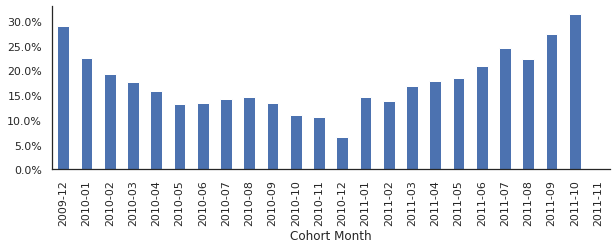

In [72]:
#Plot average retention rate for each monthly cohort
sns.set_style('white')
retention_ave_m['mean'].plot.bar(figsize=(10, 3))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
sns.despine()

In [73]:
#Get the Terminal Retention Rate for each monthly cohort
#Fill the NaN with the last number of each row and then put that value in a column
 
terminal_m=(retention_matrix_m).drop([0,'mean'], axis=1)
terminal_m['Terminal Retention Rate'] = terminal_m.ffill(axis=1).iloc[:, -1]
terminal_m['Terminal Retention Rate']

Cohort Month
2009-12    0.354839
2010-01    0.247678
2010-02    0.175758
2010-03    0.206718
2010-04    0.208333
2010-05    0.145374
2010-06    0.173913
2010-07    0.196532
2010-08    0.179641
2010-09    0.171674
2010-10    0.183381
2010-11    0.239264
2010-12    0.173913
2011-01    0.253731
2011-02    0.137255
2011-03    0.223776
2011-04    0.171429
2011-05    0.226415
2011-06    0.261682
2011-07    0.265957
2011-08    0.186813
2011-09    0.320652
2011-10    0.314010
2011-11         NaN
Freq: M, Name: Terminal Retention Rate, dtype: float64

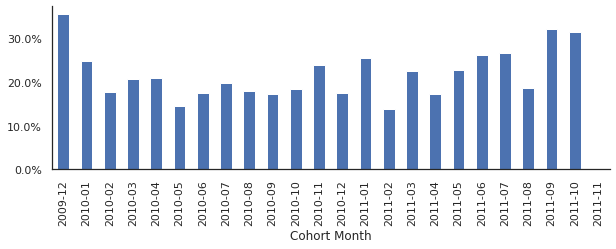

In [74]:
#Plot Terminal Retention Rate for each monthly cohort
sns.set_style('white')
terminal_m['Terminal Retention Rate'].plot.bar(figsize=(10, 3))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
sns.despine()

In [75]:
#Get the average terminal retention rate of all cohort terminal retention rates
'{:.2%}'.format(terminal_m['Terminal Retention Rate'].mean())

'21.82%'

### f. Monthly Orders

In [76]:
#Pivot a table with orders for each cohort.
#Remove the decimal for these whole numbers.
cohort_pivot_orders_m = df_cohort_m.pivot_table(index='Cohort Month', columns = 'Month Period Number', values='Orders')
cohort_pivot_orders_m.applymap('{:.0f}'.format)

Month Period Number,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Cohort Month,,,,,,,,,,,,,,,,,,,,,
2009-12,3067,1112,1080,1315,1127,1080,1192,1012,946,1140,...,664,886,682,839,918,811,819,1104,1062,1639
2010-01,1135,209,336,309,315,270,278,269,275,398,...,219,138,223,192,233,247,258,220,412,nan
2010-02,1078,206,244,279,256,211,213,285,302,300,...,120,181,180,163,162,265,287,272,nan,nan
2010-03,1340,261,311,363,277,283,315,484,487,183,...,174,195,194,232,203,312,387,nan,nan,nan
2010-04,795,115,116,117,129,166,218,207,135,113,...,95,124,85,91,169,214,nan,nan,nan,nan
2010-05,720,90,79,101,75,206,160,144,47,35,...,52,80,150,138,124,nan,nan,nan,nan,nan
2010-06,799,94,105,138,203,265,126,65,46,83,...,92,73,156,190,nan,nan,nan,nan,nan,nan
2010-07,586,61,102,168,202,93,60,55,58,58,...,94,141,142,nan,nan,nan,nan,nan,nan,nan
2010-08,538,77,142,178,111,38,32,34,75,49,...,104,97,nan,nan,nan,nan,nan,nan,nan,nan


In [77]:
#Sum each row to get the total orders from each cohort and put it in its own dataframe
cohort_total_orders_m = cohort_pivot_orders_m
cohort_total_orders_m['Total Orders'] = cohort_total_orders_m.sum(axis = 1)
cohort_total_orders_m

Month Period Number,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Total Orders
Cohort Month,,,,,,,,,,,,,,,,,,,,,
2009-12,3067.0,1112.0,1080.0,1315.0,1127.0,1080.0,1192.0,1012.0,946.0,1140.0,...,886.0,682.0,839.0,918.0,811.0,819.0,1104.0,1062.0,1639.0,28483.0
2010-01,1135.0,209.0,336.0,309.0,315.0,270.0,278.0,269.0,275.0,398.0,...,138.0,223.0,192.0,233.0,247.0,258.0,220.0,412.0,NaN,7044.0
2010-02,1078.0,206.0,244.0,279.0,256.0,211.0,213.0,285.0,302.0,300.0,...,181.0,180.0,163.0,162.0,265.0,287.0,272.0,NaN,NaN,5650.0
2010-03,1340.0,261.0,311.0,363.0,277.0,283.0,315.0,484.0,487.0,183.0,...,195.0,194.0,232.0,203.0,312.0,387.0,NaN,NaN,NaN,6669.0
2010-04,795.0,115.0,116.0,117.0,129.0,166.0,218.0,207.0,135.0,113.0,...,124.0,85.0,91.0,169.0,214.0,NaN,NaN,NaN,NaN,3266.0
2010-05,720.0,90.0,79.0,101.0,75.0,206.0,160.0,144.0,47.0,35.0,...,80.0,150.0,138.0,124.0,NaN,NaN,NaN,NaN,NaN,2502.0
2010-06,799.0,94.0,105.0,138.0,203.0,265.0,126.0,65.0,46.0,83.0,...,73.0,156.0,190.0,NaN,NaN,NaN,NaN,NaN,NaN,2776.0
2010-07,586.0,61.0,102.0,168.0,202.0,93.0,60.0,55.0,58.0,58.0,...,141.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2060.0
2010-08,538.0,77.0,142.0,178.0,111.0,38.0,32.0,34.0,75.0,49.0,...,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1778.0


In [78]:
#Remove column with orders totals from a dataframe
cohort_pivot_orders_m=cohort_pivot_orders_m.iloc[: , :-1]

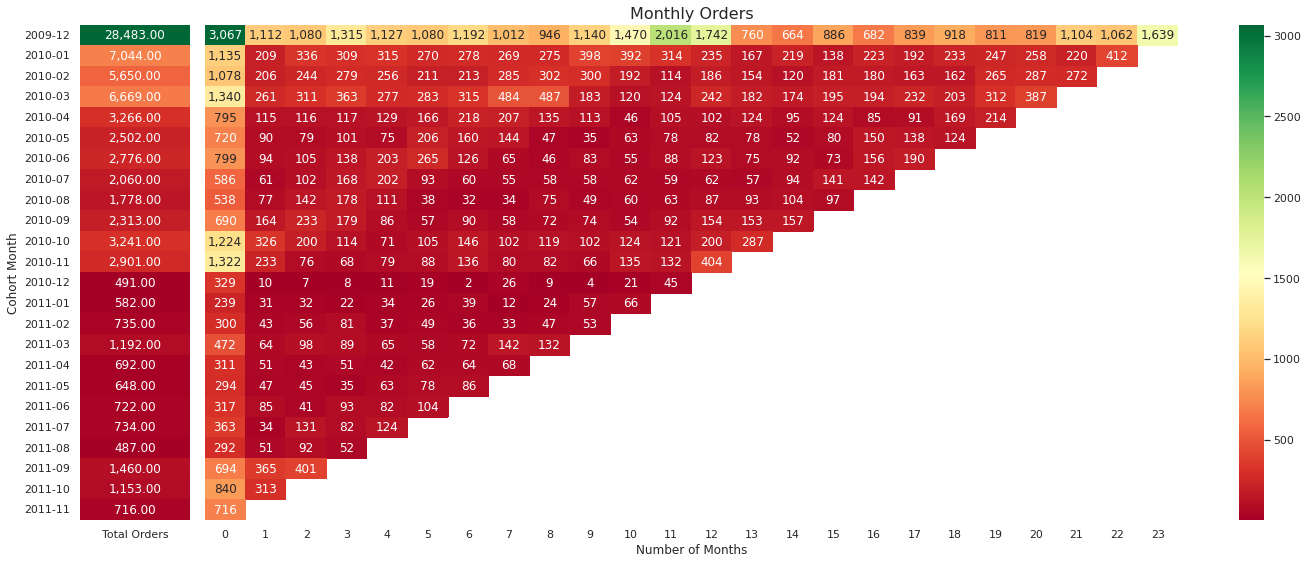

In [79]:
#Create a heatmap for cohort orders by month
#Use the previous dataframe without the total orders column
#Add a column with cohort size
sns.set_style('white')
fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
sns.heatmap(cohort_pivot_orders_m, mask=cohort_pivot_orders_m.isnull(), annot=True, fmt=',.0f', cmap='RdYlGn', ax=ax[1])

ax[1].set_title('Monthly Orders', fontsize=16)
ax[1].set(xlabel='Number of Months', ylabel='')

cohort_orders_m = pd.DataFrame(cohort_total_orders_m['Total Orders']).rename(columns={0: 'Total Orders'})
sns.heatmap(cohort_orders_m, annot=True, cbar=False, fmt=',.2f', ax=ax[0], cmap='RdYlGn')
fig.tight_layout()

In [80]:
#Get the Average orders per month per cohort
orders_ave_m = cohort_pivot_orders_m
orders_ave_m['mean'] = cohort_pivot_orders_m.mean(axis=1)
orders_ave_m['mean']

Cohort Month
2009-12    1186.791667
2010-01     306.260870
2010-02     256.818182
2010-03     317.571429
2010-04     163.300000
2010-05     131.684211
2010-06     154.222222
2010-07     121.176471
2010-08     111.125000
2010-09     154.200000
2010-10     231.500000
2010-11     223.153846
2010-12      40.916667
2011-01      52.909091
2011-02      73.500000
2011-03     132.444444
2011-04      86.500000
2011-05      92.571429
2011-06     120.333333
2011-07     146.800000
2011-08     121.750000
2011-09     486.666667
2011-10     576.500000
2011-11     716.000000
Freq: M, Name: mean, dtype: float64

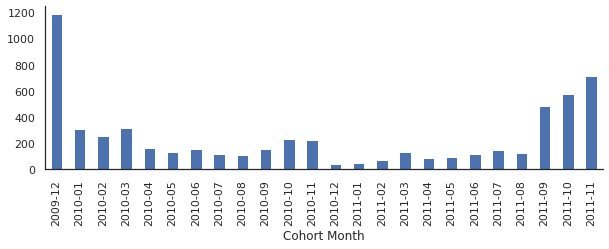

In [81]:
#Plot average monthly orders for each cohort
sns.set_style('white')
orders_ave_m['mean'].plot.bar(figsize=(10, 3))
sns.despine()

### g. Monthly Revenue

In [82]:
#Pivot a table with revenue for each cohort.
#Remove the decimal for these whole numbers.
cohort_pivot_rev_m = df_cohort_m.pivot_table(index='Cohort Month', columns = 'Month Period Number', values='Revenue')
cohort_pivot_rev_m.applymap('{:.0f}'.format)

Month Period Number,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Cohort Month,,,,,,,,,,,,,,,,,,,,,
2009-12,62734,38288,22007,32567,25134,25486,25294,24434,33301,31340,...,19508,20240,15045,19918,28520,21702,20378,36421,27590,35911
2010-01,22985,4120,6376,5121,8797,13667,6518,7187,6482,9227,...,5033,3237,5611,4344,5222,7300,5956,8753,6553,nan
2010-02,19773,3701,7274,5315,6346,4158,5460,4984,5413,6183,...,2226,4348,3272,4884,3028,5277,5817,4824,nan,nan
2010-03,22889,5717,5386,6518,5284,5869,7290,8681,10702,4205,...,3953,3545,3645,4236,5101,6024,8430,nan,nan,nan
2010-04,15362,1803,1763,2538,3549,4037,4250,3405,2896,1871,...,1550,2366,1932,1748,3902,3283,nan,nan,nan,nan
2010-05,14216,1880,1510,1573,1727,4190,2207,2135,757,1295,...,1286,1940,3014,2635,1879,nan,nan,nan,nan,nan
2010-06,13518,2016,1941,2373,3716,7013,2516,1549,2254,5112,...,4280,2821,4790,4118,nan,nan,nan,nan,nan,nan
2010-07,8680,988,1090,2618,2560,1421,900,944,490,491,...,1542,1626,1880,nan,nan,nan,nan,nan,nan,nan
2010-08,7638,1394,3524,2524,1726,499,746,536,1414,789,...,1607,1345,nan,nan,nan,nan,nan,nan,nan,nan


In [83]:
#Sum each row to get the total revenue from each cohort and put it in its own dataframe
cohort_total_rev_m = cohort_pivot_rev_m
cohort_total_rev_m['Total Revenue'] = cohort_total_rev_m.sum(axis = 1)
cohort_total_rev_m

Month Period Number,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Total Revenue
Cohort Month,,,,,,,,,,,,,,,,,,,,,
2009-12,62733.680,38287.58,22007.46,32566.95,25134.330,25485.61,25293.52,24434.49,33300.64,31339.80,...,20239.81,15045.04,19918.20,28520.19,21702.26,20378.25,36420.88,27589.68,35910.55,713769.950
2010-01,22984.870,4119.92,6376.12,5120.63,8796.820,13666.87,6518.50,7186.94,6481.87,9226.73,...,3237.46,5611.20,4344.24,5221.99,7299.94,5956.30,8753.34,6553.04,NaN,163740.800
2010-02,19773.360,3701.29,7273.64,5315.07,6345.940,4158.18,5459.89,4984.39,5412.73,6183.28,...,4348.06,3271.58,4883.74,3027.94,5276.82,5817.07,4823.62,NaN,NaN,116175.680
2010-03,22888.671,5716.83,5386.12,6517.85,5284.370,5868.94,7289.80,8681.28,10702.21,4204.80,...,3544.94,3645.15,4236.04,5100.85,6024.24,8429.56,NaN,NaN,NaN,131365.901
2010-04,15362.100,1802.72,1762.67,2538.08,3548.510,4036.75,4249.84,3405.28,2896.16,1871.22,...,2366.27,1932.45,1748.47,3902.28,3283.27,NaN,NaN,NaN,NaN,64071.940
2010-05,14215.600,1879.83,1509.78,1573.35,1727.341,4189.57,2206.98,2135.24,757.25,1295.01,...,1939.86,3013.92,2634.98,1879.27,NaN,NaN,NaN,NaN,NaN,48036.691
2010-06,13517.570,2016.47,1941.16,2372.95,3715.960,7012.54,2515.71,1549.26,2253.62,5111.51,...,2820.69,4789.56,4118.06,NaN,NaN,NaN,NaN,NaN,NaN,69478.270
2010-07,8680.070,988.32,1089.64,2617.84,2559.640,1420.84,900.27,944.40,489.89,491.11,...,1626.41,1880.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28935.310
2010-08,7637.630,1393.62,3524.49,2523.63,1726.480,499.18,746.46,535.78,1414.48,788.87,...,1345.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28510.530


In [84]:
#Remove column with revenue totals from a dataframe
cohort_pivot_rev_m=cohort_pivot_rev_m.iloc[: , :-1]

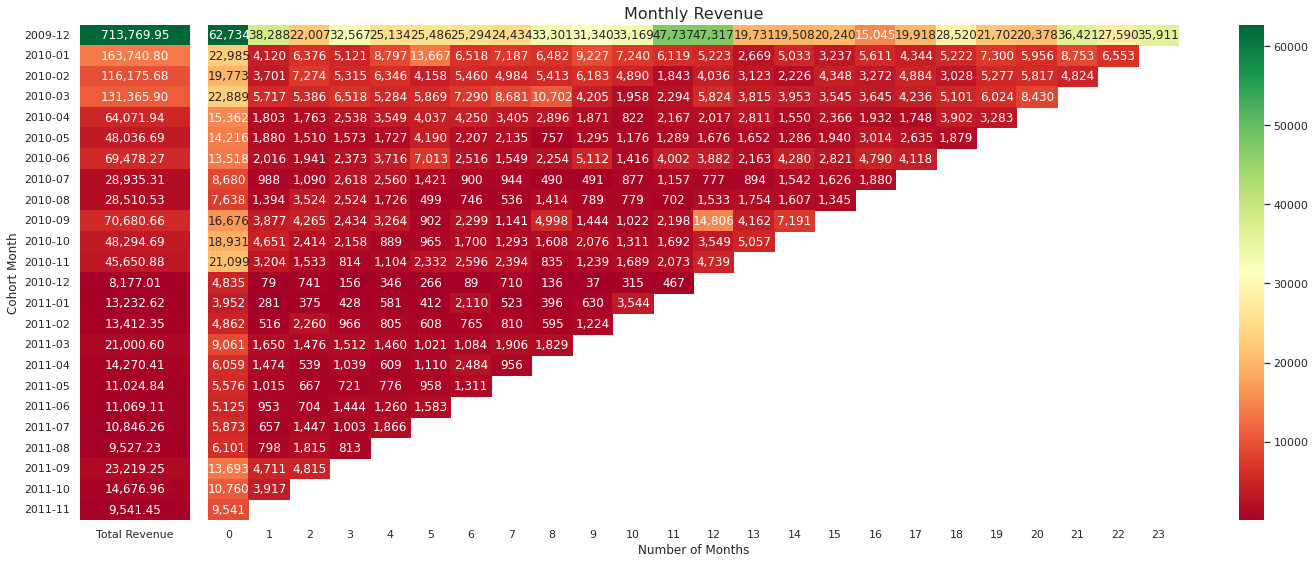

In [85]:
#Create a heatmap for cohort revenue by month
#Use the previous dataframe without the total revenue column
#Add a column with cohort size
sns.set_style('white')
fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
sns.heatmap(cohort_pivot_rev_m, mask=cohort_pivot_rev_m.isnull(), annot=True, fmt=',.0f', cmap='RdYlGn', ax=ax[1])

ax[1].set_title('Monthly Revenue', fontsize=16)
ax[1].set(xlabel='Number of Months', ylabel='')

cohort_revenue_m = pd.DataFrame(cohort_total_rev_m['Total Revenue']).rename(columns={0: 'Total Revenue'})
sns.heatmap(cohort_revenue_m, annot=True, cbar=False, fmt=',.2f', ax=ax[0], cmap='RdYlGn')
fig.tight_layout()

In [86]:
#Get the Average Revenue per month per cohort
revenue_ave_m = cohort_pivot_rev_m
revenue_ave_m['mean'] = cohort_pivot_rev_m.mean(axis=1)
revenue_ave_m['mean']

Cohort Month
2009-12    29740.414583
2010-01     7119.165217
2010-02     5280.712727
2010-03     6255.519095
2010-04     3203.597000
2010-05     2528.246895
2010-06     3859.903889
2010-07     1702.077059
2010-08     1781.908125
2010-09     4712.044000
2010-10     3449.620714
2010-11     3511.606154
2010-12      681.417500
2011-01     1202.965455
2011-02     1341.235000
2011-03     2333.400000
2011-04     1783.801250
2011-05     1574.977143
2011-06     1844.851667
2011-07     2169.252000
2011-08     2381.807500
2011-09     7739.750000
2011-10     7338.480000
2011-11     9541.450000
Freq: M, Name: mean, dtype: float64

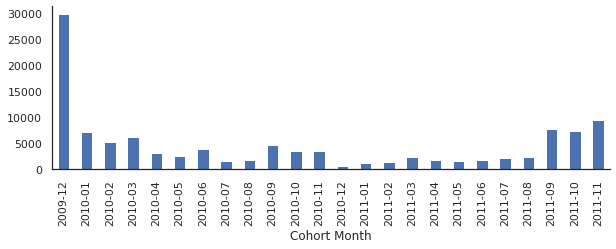

In [87]:
#Plot average monthly revenue for each cohort
sns.set_style('white')
revenue_ave_m['mean'].plot.bar(figsize=(10, 3))
sns.despine()

# 6. Analysis of Quarterly Cohorts

### a. Create Quarterly Cohorts

In [88]:
df.head()

,index,InvoiceNo,StockCode,Quantity,Date,Price,Revenue,CustomerID,Country,Year,Month,Order Month,Cohort Month,Order Quarter,Cohort Quarter
0,9,489435,22349,12,2009-12-01,3.75,45.00,13085.0,United Kingdom,2009,12,2009-12,2009-12,2009Q4,2009Q4
1,15,489436,84879,16,2009-12-01,1.69,27.04,13078.0,United Kingdom,2009,12,2009-12,2009-12,2009Q4,2009Q4
2,13,489436,21755,18,2009-12-01,5.45,98.10,13078.0,United Kingdom,2009,12,2009-12,2009-12,2009Q4,2009Q4
3,53,489437,22112,3,2009-12-01,4.95,14.85,15362.0,United Kingdom,2009,12,2009-12,2009-12,2009Q4,2009Q4
4,73,489439,22139,9,2009-12-01,4.95,44.55,12682.0,France,2009,12,2009-12,2009-12,2009Q4,2009Q4


In [89]:
#Aggregate the data by cohort and order quarter and count the number of unique customers in each group.
#Calculate the number of periods between the cohort quarter and the quarter of purchase
#Rename columns as we like.
df_cohort_q = df.groupby(['Cohort Quarter', 'Order Quarter']).agg({'CustomerID':'nunique','InvoiceNo': 'count', 'Price':'mean', 'Revenue': 'sum'}).reset_index(drop=False)
df_cohort_q['Quarter Period Number'] = (df_cohort_q['Order Quarter'] - df_cohort_q['Cohort Quarter']).apply(attrgetter('n'))
df_cohort_q.rename(columns = {'InvoiceNo': 'Orders', 'CustomerID': 'Total Customers', 'Price': 'Average Price'}, inplace=True)
df_cohort_q

,Cohort Quarter,Order Quarter,Total Customers,Orders,Average Price,Revenue,Quarter Period Number
0,2009Q4,2009Q4,744,3067,3.153857,62733.680,0
1,2009Q4,2010Q1,431,3507,3.308090,92861.990,1
2,2009Q4,2010Q2,442,3399,3.257223,75913.460,2
3,2009Q4,2010Q3,408,3098,3.280823,89074.930,3
4,2009Q4,2010Q4,483,5228,3.224862,128222.900,4
5,2009Q4,2011Q1,326,2310,2.926229,59477.940,5
6,2009Q4,2011Q2,330,2439,2.962382,63483.430,6
7,2009Q4,2011Q3,331,2734,2.799316,78501.390,7
8,2009Q4,2011Q4,355,2701,2.726116,63500.230,8
9,2010Q1,2010Q1,1040,4304,3.114259,79844.231,0


In [90]:
#Pivot the table so each row describes a cohort and each column is a period.
#Remove the decimal for these whole numbers.
cohort_pivot_q = df_cohort_q.pivot_table(index='Cohort Quarter', columns = 'Quarter Period Number', values='Total Customers')
cohort_pivot_q.applymap('{:.0f}'.format)

Quarter Period Number,0,1,2,3,4,5,6,7,8
Cohort Quarter,,,,,,,,,
2009Q4,744,431,442,408,483,326,330,331,355
2010Q1,1040,506,490,509,370,354,388,349,nan
2010Q2,721,249,308,152,219,183,198,nan,nan
2010Q3,573,230,125,139,166,157,nan,nan,nan
2010Q4,744,119,158,133,219,nan,nan,nan,nan
2011Q1,312,100,87,95,nan,nan,nan,nan,nan
2011Q2,318,126,104,nan,nan,nan,nan,nan,nan
2011Q3,369,149,nan,nan,nan,nan,nan,nan,nan
2011Q4,385,nan,nan,nan,nan,nan,nan,nan,nan


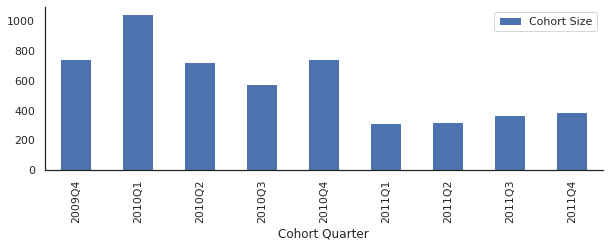

In [91]:
#Look at cohort starting size over time
cohort_size_q = cohort_pivot_q.iloc[:,0]
cohort_size_df_q = pd.DataFrame(cohort_size_q).rename(columns={0: 'Cohort Size'})
sns.set_style('white')
cohort_size_df_q.plot.bar(figsize=(10, 3))
sns.despine()

### b. Quarterly Initial Drop-off Rates

In [92]:
#Get the Initial Drop-off Rate for each cohort
cohort_size_q = cohort_pivot_q.iloc[:,0]
retention_matrix_q = cohort_pivot_q.divide(cohort_size_q, axis=0)
dropoff_q = retention_matrix_q 
dropoff_q['Dropoff Rate'] = dropoff_q[0]-dropoff_q[1]
dropoff_q['Dropoff Rate']

Cohort Quarter
2009Q4    0.420699
2010Q1    0.513462
2010Q2    0.654646
2010Q3    0.598604
2010Q4    0.840054
2011Q1    0.679487
2011Q2    0.603774
2011Q3    0.596206
2011Q4         NaN
Freq: Q-DEC, Name: Dropoff Rate, dtype: float64

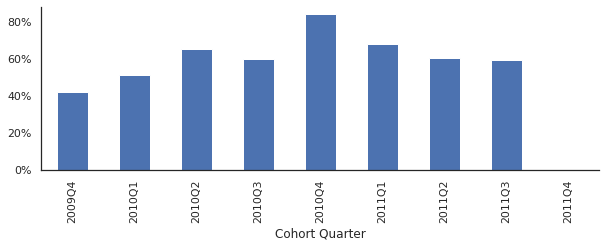

In [93]:
#Plot Initial Dropoff Rate for each cohort
#This is the percent of people who make at least one purchase one month and then do not purchase again the next month.
sns.set_style('white')
dropoff_q['Dropoff Rate'].plot.bar(figsize=(10, 3))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
sns.despine()

In [94]:
#Get the average quarterly dropoff rates of all cohorts
'{:.2%}'.format(dropoff_q['Dropoff Rate'].mean())

'61.34%'

### c. Quarterly Retention Rates

In [95]:
#Divide the values in each row by the first value of the row which is the cohort size when it started.
#Get the first column then divide each item in the row by that first number.
cohort_size_q = cohort_pivot_q.iloc[:,0]
retention_matrix_q = cohort_pivot_q.divide(cohort_size_q, axis=0)
retention_matrix_q.applymap('{:,.1%}'.format)

Quarter Period Number,0,1,2,3,4,5,6,7,8
Cohort Quarter,,,,,,,,,
2009Q4,100.0%,57.9%,59.4%,54.8%,64.9%,43.8%,44.4%,44.5%,47.7%
2010Q1,100.0%,48.7%,47.1%,48.9%,35.6%,34.0%,37.3%,33.6%,nan%
2010Q2,100.0%,34.5%,42.7%,21.1%,30.4%,25.4%,27.5%,nan%,nan%
2010Q3,100.0%,40.1%,21.8%,24.3%,29.0%,27.4%,nan%,nan%,nan%
2010Q4,100.0%,16.0%,21.2%,17.9%,29.4%,nan%,nan%,nan%,nan%
2011Q1,100.0%,32.1%,27.9%,30.4%,nan%,nan%,nan%,nan%,nan%
2011Q2,100.0%,39.6%,32.7%,nan%,nan%,nan%,nan%,nan%,nan%
2011Q3,100.0%,40.4%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2011Q4,100.0%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%


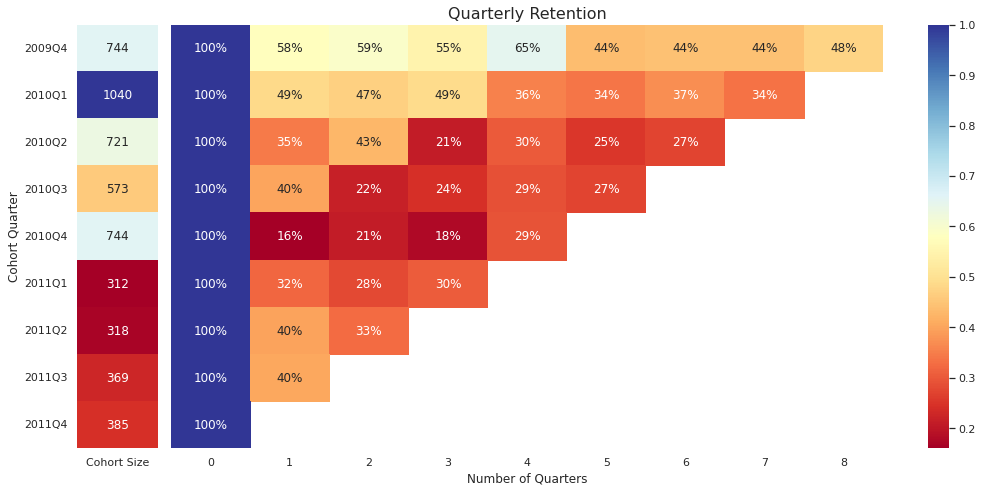

In [96]:
#Create a heatmap 
#Add a column with cohort size

sns.set_style('white')
fig, ax = plt.subplots(1, 2, figsize=(15, 7), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
sns.heatmap(retention_matrix_q, mask=retention_matrix_q.isnull(), annot=True, fmt='.0%', cmap='RdYlBu', ax=ax[1])

ax[1].set_title('Quarterly Retention', fontsize=16)
ax[1].set(xlabel='Number of Quarters', ylabel='')

cohort_size_df_q= pd.DataFrame(cohort_size_q).rename(columns={0: 'Cohort Size'})
sns.heatmap(cohort_size_df_q, annot=True, cbar=False, fmt='g', ax=ax[0], cmap='RdYlBu')
fig.tight_layout()

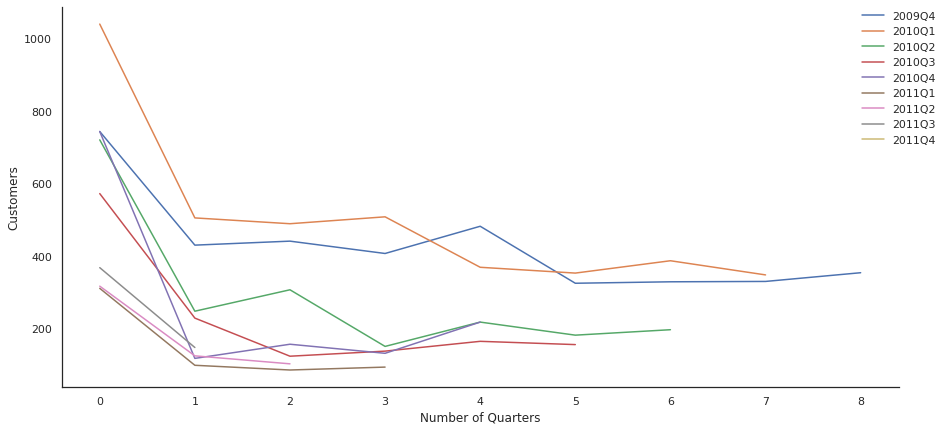

In [97]:
#Plot number of customers retained for each cohort for each quarter
sns.set(style='white')
cohorts_line_q = cohort_pivot_q.transpose()
cohorts_line_q[cohorts_line_q.columns].plot(figsize=(15,7), xlabel='Number of Quarters', ylabel='Customers')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0, frameon=False)
sns.despine()

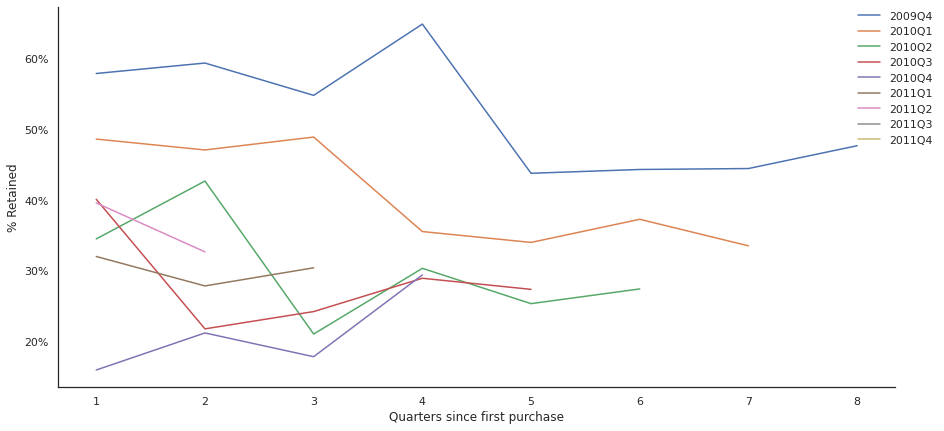

In [98]:
#Plot the percent retained for each cohort for each quarter. 
#Drop the starting quarter which is 100% for everyone
#Format the y axis to show percentages
import matplotlib.ticker as mtick
sns.set(style='white')
ret_ex_start_q=retention_matrix_q.drop([0], axis=1)
ret_ex_start_q
retention_lines_q = ret_ex_start_q.transpose()
retention_lines_q[retention_lines_q.columns].plot(figsize=(15,7), xlabel='Quarters since first purchase', ylabel='% Retained')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper right', borderaxespad=0, frameon=False)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
sns.despine()

### d. Slope of Quarterly Retention

In [99]:
#Prepare to calculate slope for each cohort
#Remove last two columns because they only have NaN or one number and can't be used for linear regression.
slope_q=cohort_pivot_q.T
slope_q=slope_q.reset_index(inplace=False)
slope_q.drop([0], axis=0, inplace=True)
slope_q=slope_q.iloc[: , :-2]
slope_q

Cohort Quarter,Quarter Period Number,2009Q4,2010Q1,2010Q2,2010Q3,2010Q4,2011Q1,2011Q2
1,1,431.0,506.0,249.0,230.0,119.0,100.0,126.0
2,2,442.0,490.0,308.0,125.0,158.0,87.0,104.0
3,3,408.0,509.0,152.0,139.0,133.0,95.0,NaN
4,4,483.0,370.0,219.0,166.0,219.0,NaN,NaN
5,5,326.0,354.0,183.0,157.0,NaN,NaN,NaN
6,6,330.0,388.0,198.0,NaN,NaN,NaN,NaN
7,7,331.0,349.0,NaN,NaN,NaN,NaN,NaN
8,8,355.0,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
#Get the slope for each cohort
#Drop the first column because it has the month period numbers
from scipy.stats import linregress
cohort_slope_q = pd.DataFrame()
for column in slope_q.columns:
  clean_slope_q = slope_q[column].dropna()
  slope, intercept, r, p, stderr = linregress(clean_slope_q.index, clean_slope_q)
  cohort_slope_q = pd.concat([cohort_slope_q,(pd.DataFrame({'Slope':slope,'Intercept':intercept}, index=[column]))])
cohort_slope_q.drop(['Quarter Period Number'], axis=0, inplace=True)
cohort_slope_q

,Slope,Intercept
2009Q4,-17.595238,467.428571
2010Q1,-29.642857,542.285714
2010Q2,-16.085714,274.466667
2010Q3,-10.500000,194.900000
2010Q4,27.500000,88.500000
2011Q1,-2.500000,99.000000
2011Q2,-22.000000,148.000000


(0.0, 7.0)

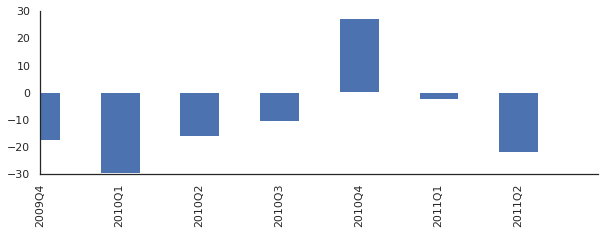

In [101]:
#Look at the slopes for the linear regression lines for each quarterly cohort's retention.
sns.set_style('white')
cohort_slope_q['Slope'].plot.bar(figsize=(10, 3))
sns.despine()
plt.ylim(-30,30)
plt.xlim(0, 7)

### d. Terminal Retention Rates

In [102]:
#Get the average retention rate for each cohort
retention_ave_q = retention_matrix_q 
retention_ave_q['mean'] = retention_matrix_q.iloc[:, 1:8].mean(axis=1)
retention_ave_q['mean'].apply('{:,.2%}'.format)

Cohort Quarter
2009Q4    52.82%
2010Q1    40.74%
2010Q2    30.26%
2010Q3    28.52%
2010Q4    21.14%
2011Q1    30.13%
2011Q2    36.16%
2011Q3    40.38%
2011Q4      nan%
Freq: Q-DEC, Name: mean, dtype: object

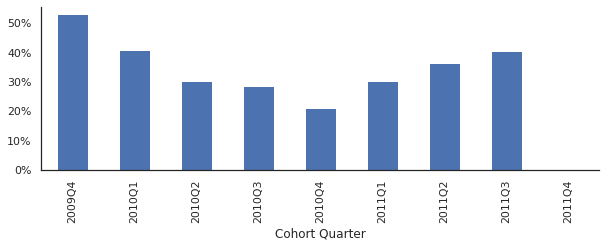

In [103]:
#Plot average retention rate for each quarterly cohort
sns.set_style('white')
retention_ave_q['mean'].plot.bar(figsize=(10, 3))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
sns.despine()

In [104]:
#Get the average quarterly retention rate
'{:.2%}'.format(retention_ave_q['mean'].mean())

'35.02%'

In [105]:
#Get the Terminal Retention Rate for each quarter cohort
#Fill the NaN with the last number of each row and then put that value in a column
 
terminal_q=(retention_matrix_q).drop([0,'mean'], axis=1)
terminal_q['Terminal Retention Rate'] = terminal_q.ffill(axis=1).iloc[:, -1]
terminal_q['Terminal Retention Rate']

Cohort Quarter
2009Q4    0.477151
2010Q1    0.335577
2010Q2    0.274619
2010Q3    0.273997
2010Q4    0.294355
2011Q1    0.304487
2011Q2    0.327044
2011Q3    0.403794
2011Q4         NaN
Freq: Q-DEC, Name: Terminal Retention Rate, dtype: float64

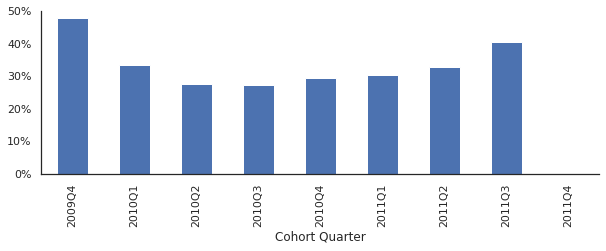

In [106]:
#Plot Terminal Retention Rate for each quarterly cohort
sns.set_style('white')
terminal_q['Terminal Retention Rate'].plot.bar(figsize=(10, 3))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
sns.despine()

In [107]:
#Get the average terminal retention rate of all quarterly cohort terminal retention rates
'{:.2%}'.format(terminal_q['Terminal Retention Rate'].mean())

'33.64%'

### e. Quarterly orders

In [108]:
#Pivot a table with orders for each cohort.
#Remove the decimal for these whole numbers.
cohort_pivot_orders_q = df_cohort_q.pivot_table(index='Cohort Quarter', columns = 'Quarter Period Number', values='Orders')
cohort_pivot_orders_q.applymap('{:.0f}'.format)

Quarter Period Number,0,1,2,3,4,5,6,7,8
Cohort Quarter,,,,,,,,,
2009Q4,3067,3507,3399,3098,5228,2310,2439,2734,2701
2010Q1,4304,2608,2406,3052,1561,1585,1957,1890,nan
2010Q2,2635,1004,1664,603,825,822,991,nan,nan
2010Q3,2054,1470,510,567,756,794,nan,nan,nan
2010Q4,3634,538,703,669,1089,nan,nan,nan,nan
2011Q1,1117,507,388,497,nan,nan,nan,nan,nan
2011Q2,1063,517,482,nan,nan,nan,nan,nan,nan
2011Q3,1565,1116,nan,nan,nan,nan,nan,nan,nan
2011Q4,1869,nan,nan,nan,nan,nan,nan,nan,nan


In [109]:
#Sum each row to get the total orders from each cohort and put it in its own dataframe
cohort_total_orders_q = cohort_pivot_orders_q
cohort_total_orders_q['Total Orders'] = cohort_total_orders_q.sum(axis = 1)
cohort_total_orders_q

Quarter Period Number,0,1,2,3,4,5,6,7,8,Total Orders
Cohort Quarter,,,,,,,,,,
2009Q4,3067.0,3507.0,3399.0,3098.0,5228.0,2310.0,2439.0,2734.0,2701.0,28483.0
2010Q1,4304.0,2608.0,2406.0,3052.0,1561.0,1585.0,1957.0,1890.0,NaN,19363.0
2010Q2,2635.0,1004.0,1664.0,603.0,825.0,822.0,991.0,NaN,NaN,8544.0
2010Q3,2054.0,1470.0,510.0,567.0,756.0,794.0,NaN,NaN,NaN,6151.0
2010Q4,3634.0,538.0,703.0,669.0,1089.0,NaN,NaN,NaN,NaN,6633.0
2011Q1,1117.0,507.0,388.0,497.0,NaN,NaN,NaN,NaN,NaN,2509.0
2011Q2,1063.0,517.0,482.0,NaN,NaN,NaN,NaN,NaN,NaN,2062.0
2011Q3,1565.0,1116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2681.0
2011Q4,1869.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1869.0


In [110]:
#Remove column with orders totals from a dataframe
cohort_pivot_orders_q=cohort_pivot_orders_q.iloc[: , :-1]

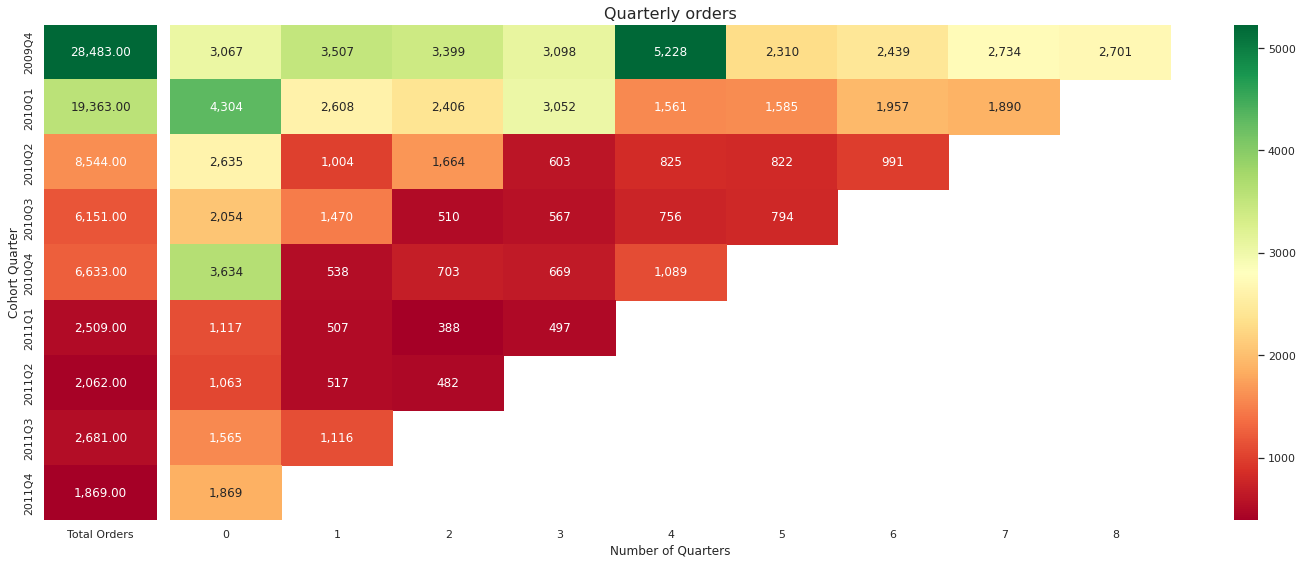

In [111]:
#Create a heatmap for cohort orders by quarter
#Use the previous dataframe without the total orders column
#Add a column with cohort size
sns.set_style('white')
fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
sns.heatmap(cohort_pivot_orders_q, mask=cohort_pivot_orders_q.isnull(), annot=True, fmt=',.0f', cmap='RdYlGn', ax=ax[1])

ax[1].set_title('Quarterly orders', fontsize=16)
ax[1].set(xlabel='Number of Quarters', ylabel='')

cohort_orders_q = pd.DataFrame(cohort_total_orders_q['Total Orders']).rename(columns={0: 'Total Orders'})
sns.heatmap(cohort_orders_q, annot=True, cbar=False, fmt=',.2f', ax=ax[0], cmap='RdYlGn')
fig.tight_layout()

In [112]:
#Get the Average orders per quarter per cohort
orders_ave_q = cohort_pivot_orders_q
orders_ave_q['mean'] = cohort_pivot_orders_q.mean(axis=1)
orders_ave_q['mean']

Cohort Quarter
2009Q4    3164.777778
2010Q1    2420.375000
2010Q2    1220.571429
2010Q3    1025.166667
2010Q4    1326.600000
2011Q1     627.250000
2011Q2     687.333333
2011Q3    1340.500000
2011Q4    1869.000000
Freq: Q-DEC, Name: mean, dtype: float64

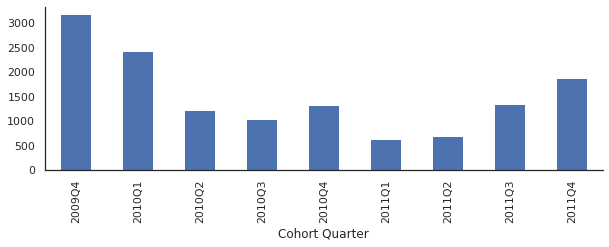

In [113]:
#Plot average quarterly orders for each cohort
sns.set_style('white')
orders_ave_q['mean'].plot.bar(figsize=(10, 3))
sns.despine()

### f. Quarterly revenue

In [114]:
#Pivot a table with revenue for each cohort.
#Remove the decimal for these whole numbers.
cohort_pivot_rev_q = df_cohort_q.pivot_table(index='Cohort Quarter', columns = 'Quarter Period Number', values='Revenue')
cohort_pivot_rev_q.applymap('{:.0f}'.format)

Quarter Period Number,0,1,2,3,4,5,6,7,8
Cohort Quarter,,,,,,,,,
2009Q4,62734,92862,75913,89075,128223,59478,63483,78501,63500
2010Q1,79844,64140,53233,62661,32004,34352,44649,40401,nan
2010Q2,48540,21264,32327,17002,20295,21551,20607,nan,nan
2010Q3,36465,24949,10582,13091,25227,17812,nan,nan,nan
2010Q4,55133,8439,12625,9725,16200,nan,nan,nan,nan
2011Q1,19047,10092,8779,9728,nan,nan,nan,nan,nan
2011Q2,19789,8023,8552,nan,nan,nan,nan,nan,nan
2011Q3,28569,15024,nan,nan,nan,nan,nan,nan,nan
2011Q4,24218,nan,nan,nan,nan,nan,nan,nan,nan


In [115]:
#Sum each row to get the total revenue from each cohort and put it in its own dataframe
cohort_total_rev_q = cohort_pivot_rev_q
cohort_total_rev_q['Total Revenue'] = cohort_total_rev_q.sum(axis = 1)
cohort_total_rev_q

Quarter Period Number,0,1,2,3,4,5,6,7,8,Total Revenue
Cohort Quarter,,,,,,,,,,
2009Q4,62733.680,92861.990,75913.46,89074.93,128222.90,59477.94,63483.43,78501.39,63500.23,713769.950
2010Q1,79844.231,64139.770,53232.88,62660.57,32003.56,34351.73,44648.77,40400.87,NaN,411282.381
2010Q2,48540.490,21264.391,32327.28,17001.82,20294.53,21550.97,20607.42,NaN,NaN,181586.901
2010Q3,36465.450,24949.210,10582.06,13091.47,25226.58,17811.73,NaN,NaN,NaN,128126.500
2010Q4,55133.470,8439.270,12625.11,9724.86,16199.87,NaN,NaN,NaN,NaN,102122.580
2011Q1,19046.750,10091.740,8779.14,9727.94,NaN,NaN,NaN,NaN,NaN,47645.570
2011Q2,19788.890,8023.490,8551.98,NaN,NaN,NaN,NaN,NaN,NaN,36364.360
2011Q3,28568.660,15024.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43592.740
2011Q4,24218.410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24218.410


In [116]:
#Remove column with revenue totals from a dataframe
cohort_pivot_rev_q=cohort_pivot_rev_q.iloc[: , :-1]

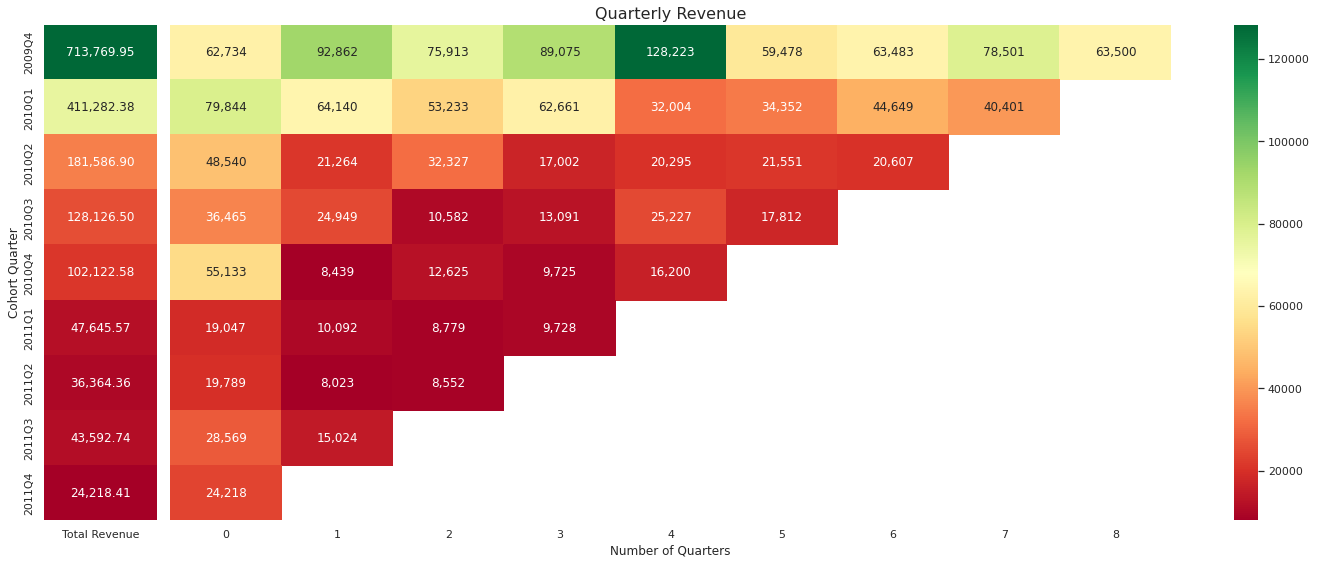

In [117]:
#Create a heatmap for cohort revenue by month
#Use the previous dataframe without the total revenue column
#Add a column with cohort size
sns.set_style('white')
fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
sns.heatmap(cohort_pivot_rev_q, mask=cohort_pivot_rev_q.isnull(), annot=True, fmt=',.0f', cmap='RdYlGn', ax=ax[1])

ax[1].set_title('Quarterly Revenue', fontsize=16)
ax[1].set(xlabel='Number of Quarters', ylabel='')

cohort_revenue_q = pd.DataFrame(cohort_total_rev_q['Total Revenue']).rename(columns={0: 'Total Revenue'})
sns.heatmap(cohort_revenue_q, annot=True, cbar=False, fmt=',.2f', ax=ax[0], cmap='RdYlGn')
fig.tight_layout()

In [118]:
#Get the Average Revenue per quarter per cohort
revenue_ave_q = cohort_pivot_rev_q
revenue_ave_q['mean'] = cohort_pivot_rev_q.mean(axis=1)
revenue_ave_q['mean']

Cohort Quarter
2009Q4    79307.772222
2010Q1    51410.297625
2010Q2    25940.985857
2010Q3    21354.416667
2010Q4    20424.516000
2011Q1    11911.392500
2011Q2    12121.453333
2011Q3    21796.370000
2011Q4    24218.410000
Freq: Q-DEC, Name: mean, dtype: float64

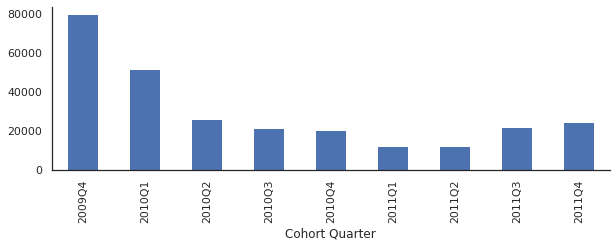

In [119]:
#Plot average monthly revenue for each cohort
sns.set_style('white')
revenue_ave_q['mean'].plot.bar(figsize=(10, 3))
sns.despine()

# 7. Interpret Results 

In [120]:
#RQ1: What are the retention rates of our customer cohorts?
    #Of our 5,206 unique customers, 67.1% of them ordered more than once during past 24 months. 
    #The average initial monthly drop off rate is 81.97% and the average quarterly dropoff rate is 61.34%, so many people do not return to make purchases in the first 1-3 months. 
    #The initial quarterly dropoff rate started at 42%, increased to a peak of 84% four quarters later, and has decreased to 59.6%, so it has improved in the last three quarters. 
    #The average monthly retention rate across all cohorts is 17.8% and is 35.0% for quarterly cohorts. People return to place orders more every three months than every month. 
    #After the first month, the slope of retention is negative for customer cohorts that are over 1 year old, but is positive for most cohorts that are under one year old. 
    #The average monthly terminal retention rate is 21.82% and is 33.64% for quarterly cohorts. 
    #The terminal retention rate of quarterly cohorts has increased from 27.4% to 40.4% over the past four quarters, but this may be due to the fact that newer cohorts have fewer quarters of data and have higher retention rates.

#RQ2: Which cohorts place the most orders and produce the most revenue?
    #The monthly and quarterly cohort that consistently places the most orders and brings in the most revenue is the first monthly and the first quarterly cohort.
    #The first cohort may represent loyal customers who have been purchasing for longer than the two years represented by the data. 
    #Orders and revenue produced by monthly and quarterly cohorts were in decline for the first six quarters, but have increased over the past three quarters.